In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as skt
import numpy as np
import pickle
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neural_network import MLPRegressor
import sklearn.metrics as metrics

### Features para Umidade relativa

In [2]:
target_wanderlay = ['UMIDADE RELATIVA DO MAXIMA AR (%)']
features_UR_wanderlay = ['Altitude(metros)',
                         'Latitude',
                         'Longitude',
                         'TEMPERATURA MAXIMA (C)',
                        'TEMPERATURA MINIMA (C)']
features_UR_wanderlay

['Altitude(metros)',
 'Latitude',
 'Longitude',
 'TEMPERATURA MAXIMA (C)',
 'TEMPERATURA MINIMA (C)']

### Criando o dataframe que ira guardar os valores d

In [4]:
data_ur_erros = pd.DataFrame(columns=['Month','Qto_estacios','ER_mean','ER_min','ER_max','ER_std','Variance','R2_score','MAE','MSE','MSLE','MedLE'])

### Pegando as base de dados do primeiro mês


In [5]:
data_mean_jan = pd.read_csv('../Dados/Brasil_1_mean.csv')

In [7]:
X_train, X_test, y_train, y_test = train_test_split(data_mean_jan[features_UR_wanderlay], 
                                                    data_mean_jan[target_wanderlay],test_size=.25)

scaler_x = MinMaxScaler(feature_range=(0,1))
scaler_y = MinMaxScaler(feature_range=(0,1))

scaler_x.fit(X_train)
X_train = scaler_x.transform(X_train)
X_test  = scaler_x.transform(X_test)

scaler_y.fit(y_train)
y_train = scaler_y.transform(y_train)
y_test  = scaler_y.transform(y_test)


mlp = MLPRegressor(hidden_layer_sizes=(2*len(features_UR_wanderlay)+1), activation='logistic', solver='lbfgs', alpha=0.0001, 
                  batch_size='auto',learning_rate='constant', learning_rate_init=0.09, power_t=0.5, max_iter=1000, shuffle=True, 
                   random_state=None, tol=0.0001, verbose=False, warm_start=False, momentum=0.9, nesterovs_momentum=True,
                   early_stopping=False, validation_fraction=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-08)

mlp = mlp.fit(X_train,y_train.ravel())
y_pred = mlp.predict(X_test)

y_test = scaler_y.inverse_transform(y_test).ravel()
y_pred = scaler_y.inverse_transform([y_pred,]).ravel()

variance = metrics.explained_variance_score(y_test,y_pred)
MAE = metrics.mean_absolute_error(y_test,y_pred)
MSE = metrics.mean_squared_error(y_test,y_pred)
MSLE = metrics.mean_squared_log_error(y_test,y_pred)
MedLE = metrics.median_absolute_error(y_test,y_pred)
r2_score = metrics.r2_score(y_test,y_pred)

print('Variance: {}'.format(variance))
print('MAE: {}'.format(MAE))
print('MSE: {}'.format(MSE))
print('MSLE: {}'.format(MSLE))
print('MedLE: {}'.format(MedLE))
print('R2 Score: {}'.format(r2_score))
errors=abs(y_test-y_pred)
print('Error(UR_true - UR_pred)')
print('MIN: {} \nMAX: {} \nMEAN: {}\nStd: {}'.format(errors.min(),errors.max(),errors.mean(),errors.std()))

Variance: 0.9186978210440064
MAE: 1.7162043723483995
MSE: 4.812423085824656
MSLE: 0.0008476038981750797
MedLE: 1.5904715875208524
R2 Score: 0.9186625992920191
Error(UR_true - UR_pred)
MIN: 0.040776318186715343 
MAX: 6.715788767994752 
MEAN: 1.7162043723483995
Std: 1.3664061029419081


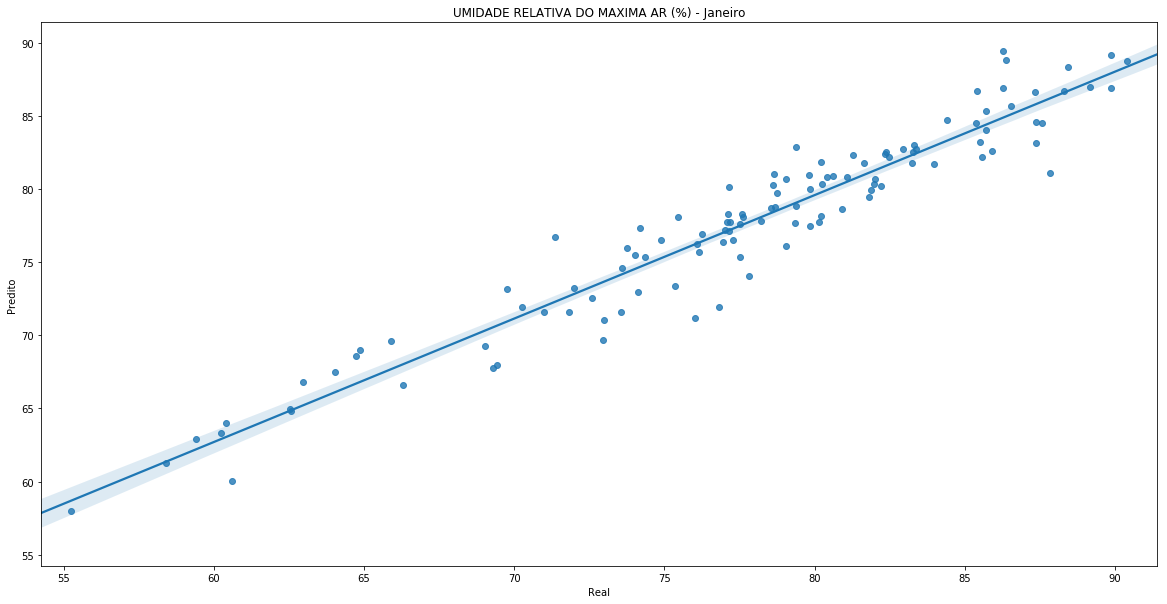

In [11]:
fig,ax = plt.subplots(figsize=(20,10))
sns.regplot(y_test, y_pred,ax=ax)
plt.xlim((min(y_test.min(),y_pred.min())-1,max(y_test.max(),y_pred.max())+1))
plt.ylim((min(y_test.min(),y_pred.min())-1,max(y_test.max(),y_pred.max())+1))
plt.xlabel('Real')
plt.ylabel('Predito')
plt.title( target_wanderlay[0] +' - Janeiro')
plt.savefig('../Validacao/graph/UR_max_jan.png')

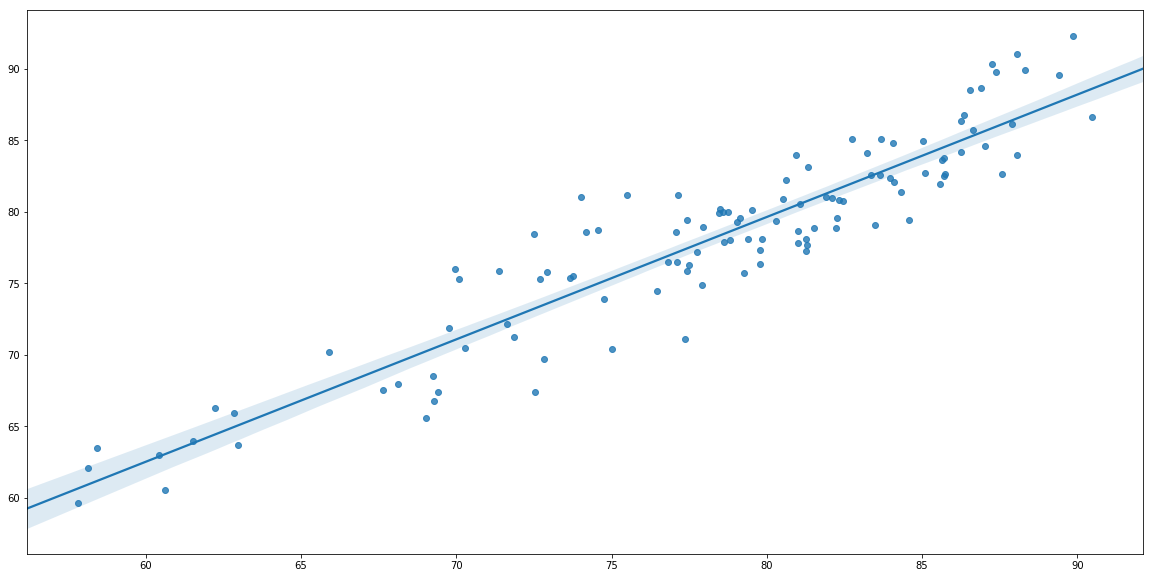

In [26]:
fig,ax = plt.subplots(figsize=(20,10))
sns.regplot(y_test, y_pred,ax=ax)

In [12]:
#['Month','ER_mean','ER_min','ER_max','ER_std','Variance','R2_score','MAE','MSE','MSLE','MedLE']
data_ur_erros.loc[1]=['Janeiro',len(data_mean_jan),errors.mean(),errors.min(),errors.max(),errors.std(),variance,r2_score,MAE,MSE,MSLE,MedLE]
data_ur_erros

,Month,Qto_estacios,ER_mean,ER_min,ER_max,ER_std,Variance,R2_score,MAE,MSE,MSLE,MedLE
1,Janeiro,458,1.716204,0.040776,6.715789,1.366406,0.918698,0.918663,1.716204,4.812423,0.000848,1.590472


In [13]:
pickle.dump(mlp,open('../Models/URmax/urmax_1.model','wb'))

## Fevereiro 

In [14]:
data_mean_fev = pd.read_csv('../Dados/Brasil_2_mean.csv')
data_mean_fev.head(5)

,Nome,Altitude(metros),Codigo OMM,Day,H(UTC),Latitude,Longitude,Month,PRECIPITACAO (mm),PRESSAO ATMOSFERICA (hPa),...,TEMPERATURA DO AR (C),TEMPERATURA DO PONTO DE ORVALHO (C),TEMPERATURA MAXIMA (C),TEMPERATURA MINIMA (C),TEMPERATURA MÁXIMA DO PONTO DE ORVALHO (C),TEMPERATURA MÍNIMA DO PONTO DE ORVALHO (C),UMIDADE RELATIVA DO AR (%),UMIDADE RELATIVA DO MAXIMA AR (%),UMIDADE RELATIVA DO MINIMA AR (%),Year
0,Abrolhos-A422,21.0,86765.0,14.342558,11.526834,-17.963016,-38.703288,2.0,0.062558,1011.875577,...,27.061635,22.703732,27.438134,26.707338,23.128386,22.295178,77.356604,79.134382,75.533124,2012.864990
1,Acaraú-A360,67.0,81755.0,14.646465,11.500000,-3.121067,-40.087288,2.0,0.167845,1003.145665,...,26.763510,22.455934,27.345918,26.229398,22.874327,22.052125,79.125421,81.441709,76.664352,2013.010101
2,Afonso Cláudio-A657,507.0,86827.0,14.754386,11.500000,-20.104194,-41.106861,2.0,0.136330,956.387573,...,25.172844,18.401060,26.209064,24.245431,19.216484,17.651133,68.985015,72.372076,65.493421,2014.245614
3,Aimorés-A534,288.0,86803.0,14.638834,11.519928,-19.532768,-41.090801,2.0,0.087022,985.983070,...,26.704447,19.654924,27.470438,25.996772,20.279677,19.046690,68.021245,71.030468,64.930830,2012.005105
4,Alegre-A617,129.0,86828.0,14.653897,11.504052,-20.750412,-41.488852,2.0,0.146368,997.771239,...,27.041579,19.732518,27.838544,26.311581,20.373567,19.147075,68.221600,71.498895,64.898188,2011.506999


In [28]:
X_train, X_test, y_train, y_test = train_test_split(data_mean_fev[features_UR_wanderlay], 
                                                    data_mean_fev[target_wanderlay],test_size=.25)

scaler_x = MinMaxScaler(feature_range=(0,1))
scaler_y = MinMaxScaler(feature_range=(0,1))

scaler_x.fit(X_train)
X_train = scaler_x.transform(X_train)
X_test  = scaler_x.transform(X_test)

scaler_y.fit(y_train)
y_train = scaler_y.transform(y_train)
y_test  = scaler_y.transform(y_test)

mlp = MLPRegressor(hidden_layer_sizes=(2*len(features_UR_wanderlay)+1), activation='logistic', solver='lbfgs', alpha=0.0001, 
                  batch_size='auto',learning_rate='constant', learning_rate_init=0.09, power_t=0.5, max_iter=1000, shuffle=True, 
                   random_state=None, tol=0.0001, verbose=False, warm_start=False, momentum=0.9, nesterovs_momentum=True,
                   early_stopping=False, validation_fraction=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-08)

mlp = mlp.fit(X_train,y_train.ravel())
y_pred = mlp.predict(X_test)

y_test = scaler_y.inverse_transform(y_test).ravel()
y_pred = scaler_y.inverse_transform([y_pred,]).ravel()

variance = metrics.explained_variance_score(y_test,y_pred)
MAE = metrics.mean_absolute_error(y_test,y_pred)
MSE = metrics.mean_squared_error(y_test,y_pred)
MSLE = metrics.mean_squared_log_error(y_test,y_pred)
MedLE = metrics.median_absolute_error(y_test,y_pred)
r2_score = metrics.r2_score(y_test,y_pred)

print('Variance: {}'.format(variance))
print('MAE: {}'.format(MAE))
print('MSE: {}'.format(MSE))
print('MSLE: {}'.format(MSLE))
print('MedLE: {}'.format(MedLE))
print('R2 Score: {}'.format(r2_score))
errors=abs(y_test-y_pred)
print('Error(UR_true - UR_pred)')
print('MIN: {} \tMAX: {} \tMEAN: {}\tStd: {}'.format(errors.min(),errors.max(),errors.mean(),errors.std()))

Variance: 0.9066502234593973
MAE: 1.5004154538354466
MSE: 3.671357074685532
MSLE: 0.0006071838851904879
MedLE: 1.1872164074145957
R2 Score: 0.9048462933029338
Error(UR_true - UR_pred)
MIN: 0.004587187621012845 	MAX: 5.763671351871849 	MEAN: 1.5004154538354466	Std: 1.1916839096745842


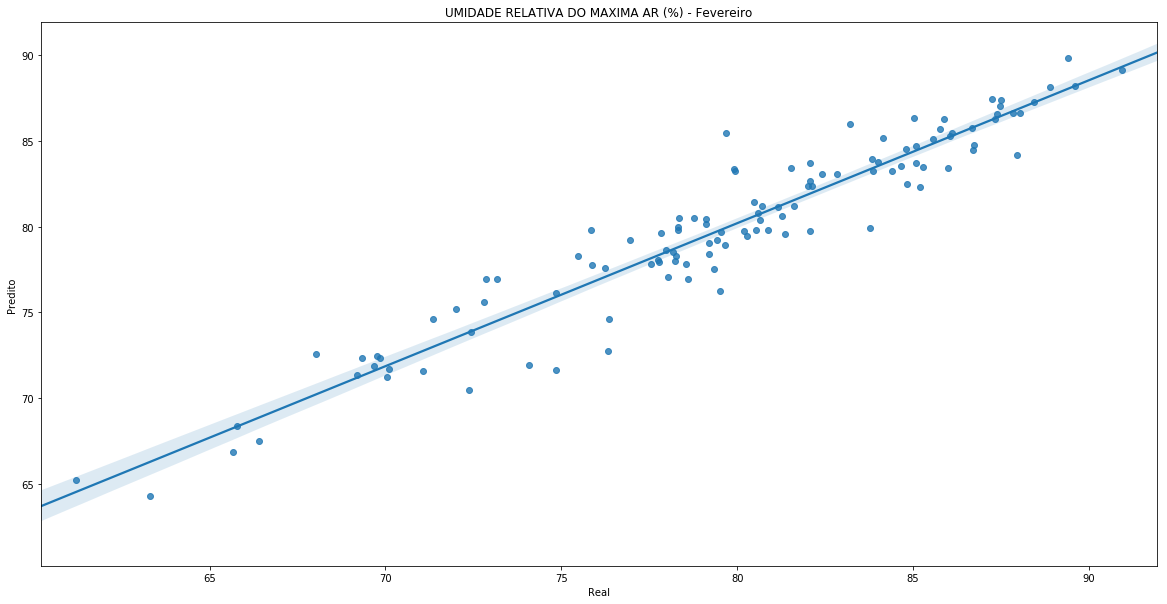

In [29]:
fig,ax = plt.subplots(figsize=(20,10))
sns.regplot(y_test, y_pred,ax=ax)
plt.xlim((min(y_test.min(),y_pred.min())-1,max(y_test.max(),y_pred.max())+1))
plt.ylim((min(y_test.min(),y_pred.min())-1,max(y_test.max(),y_pred.max())+1))
plt.xlabel('Real')
plt.ylabel('Predito')
plt.title( target_wanderlay[0] +' - Fevereiro')
plt.savefig('../Validacao/graph/UR_max_fev.png')

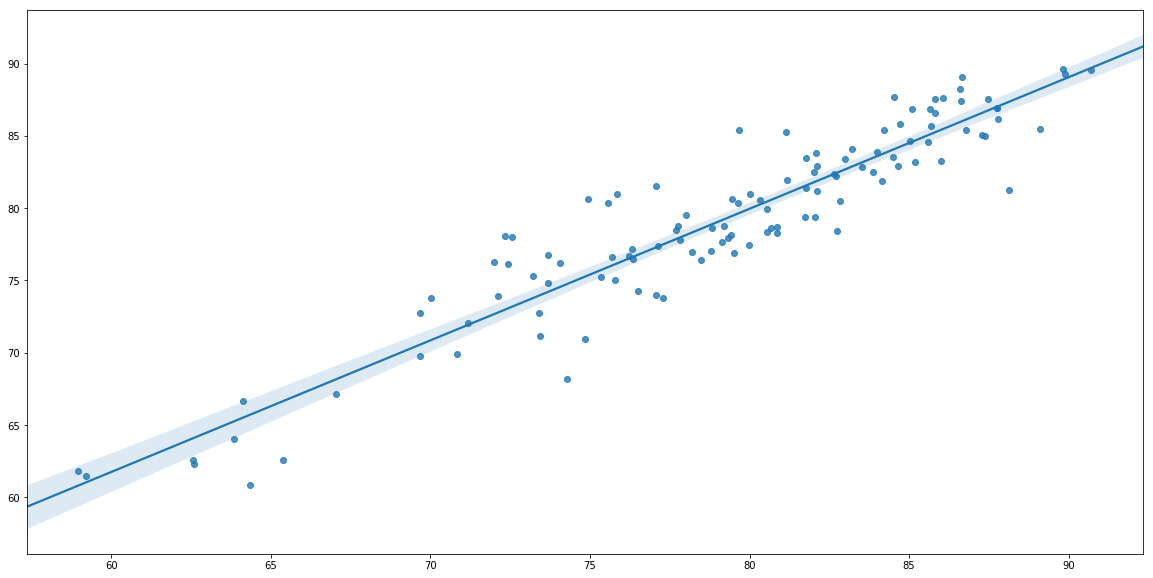

In [45]:
fig,ax = plt.subplots(figsize=(20,10))
sns.regplot(y_test, y_pred,ax=ax)

In [30]:
#['Month','ER_mean','ER_min','ER_max','ER_std','Variance','R2_score','MAE','MSE','MSLE','MedLE']
data_ur_erros.loc[2]=['Fevereiro',len(data_mean_fev),errors.mean(),errors.min(),errors.max(),errors.std(),variance,r2_score,MAE,MSE,MSLE,MedLE]
data_ur_erros

,Month,Qto_estacios,ER_mean,ER_min,ER_max,ER_std,Variance,R2_score,MAE,MSE,MSLE,MedLE
1,Janeiro,458,1.716204,0.040776,6.715789,1.366406,0.918698,0.918663,1.716204,4.812423,0.000848,1.590472
2,Fevereiro,458,1.500415,0.004587,5.763671,1.191684,0.906650,0.904846,1.500415,3.671357,0.000607,1.187216


In [31]:
pickle.dump(mlp,open('../Models/URmax/urmax_2.model','wb'))

## Março

In [32]:
data_mean_mar = pd.read_csv('../Dados/Brasil_3_mean.csv')

In [36]:
X_train, X_test, y_train, y_test = train_test_split(data_mean_mar[features_UR_wanderlay], 
                                                    data_mean_mar[target_wanderlay],test_size=.25)

scaler_x = MinMaxScaler(feature_range=(0,1))
scaler_y = MinMaxScaler(feature_range=(0,1))

scaler_x.fit(X_train)
X_train = scaler_x.transform(X_train)
X_test  = scaler_x.transform(X_test)

scaler_y.fit(y_train)
y_train = scaler_y.transform(y_train)
y_test  = scaler_y.transform(y_test)

mlp = MLPRegressor(hidden_layer_sizes=(2*len(features_UR_wanderlay)+1), activation='logistic', solver='lbfgs', alpha=0.0001, 
                  batch_size='auto',learning_rate='constant', learning_rate_init=0.09, power_t=0.5, max_iter=1000, shuffle=True, 
                   random_state=None, tol=0.0001, verbose=False, warm_start=False, momentum=0.9, nesterovs_momentum=True,
                   early_stopping=False, validation_fraction=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-08)

mlp = mlp.fit(X_train,y_train.ravel())
y_pred = mlp.predict(X_test)

y_test = scaler_y.inverse_transform(y_test).ravel()
y_pred = scaler_y.inverse_transform([y_pred,]).ravel()

variance = metrics.explained_variance_score(y_test,y_pred)
MAE = metrics.mean_absolute_error(y_test,y_pred)
MSE = metrics.mean_squared_error(y_test,y_pred)
MSLE = metrics.mean_squared_log_error(y_test,y_pred)
MedLE = metrics.median_absolute_error(y_test,y_pred)
r2_score = metrics.r2_score(y_test,y_pred)

print('Variance: {}'.format(variance))
print('MAE: {}'.format(MAE))
print('MSE: {}'.format(MSE))
print('MSLE: {}'.format(MSLE))
print('MedLE: {}'.format(MedLE))
print('R2 Score: {}'.format(r2_score))
errors=abs(y_test-y_pred)
print('\nError(UR_true - UR_pred)\n')
print('MIN: {} \nMAX: {} \nMEAN: {}\nStd: {}'.format(errors.min(),errors.max(),errors.mean(),errors.std()))

Variance: 0.9135493030062358
MAE: 1.3755743371726488
MSE: 3.299875892943646
MSLE: 0.0005250558093057141
MedLE: 1.171266064057363
R2 Score: 0.9117174872414019

Error(UR_true - UR_pred)

MIN: 0.011120920069316753 
MAX: 7.820064170465741 
MEAN: 1.3755743371726488
Std: 1.1864531747421283


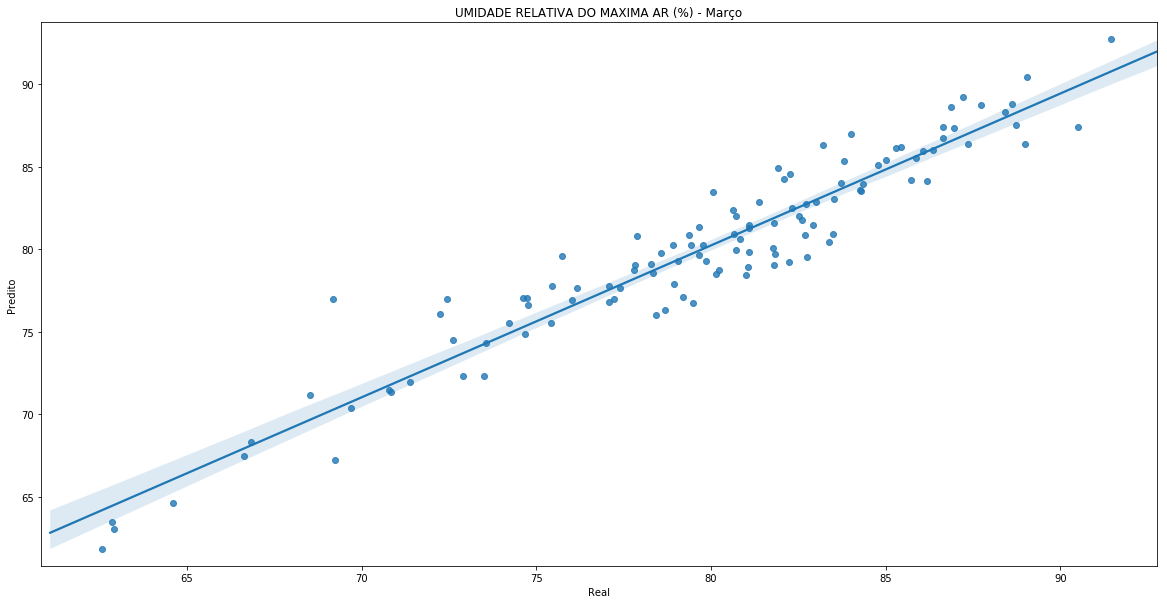

In [38]:
fig,ax = plt.subplots(figsize=(20,10))
sns.regplot(y_test, y_pred,ax=ax)
plt.xlim((min(y_test.min(),y_pred.min())-1,max(y_test.max(),y_pred.max())))
plt.ylim((min(y_test.min(),y_pred.min())-1,max(y_test.max(),y_pred.max())+1))
plt.xlabel('Real')
plt.ylabel('Predito')
plt.title( target_wanderlay[0] +' - Março')
plt.savefig('../Validacao/graph/UR_max_mar.png')

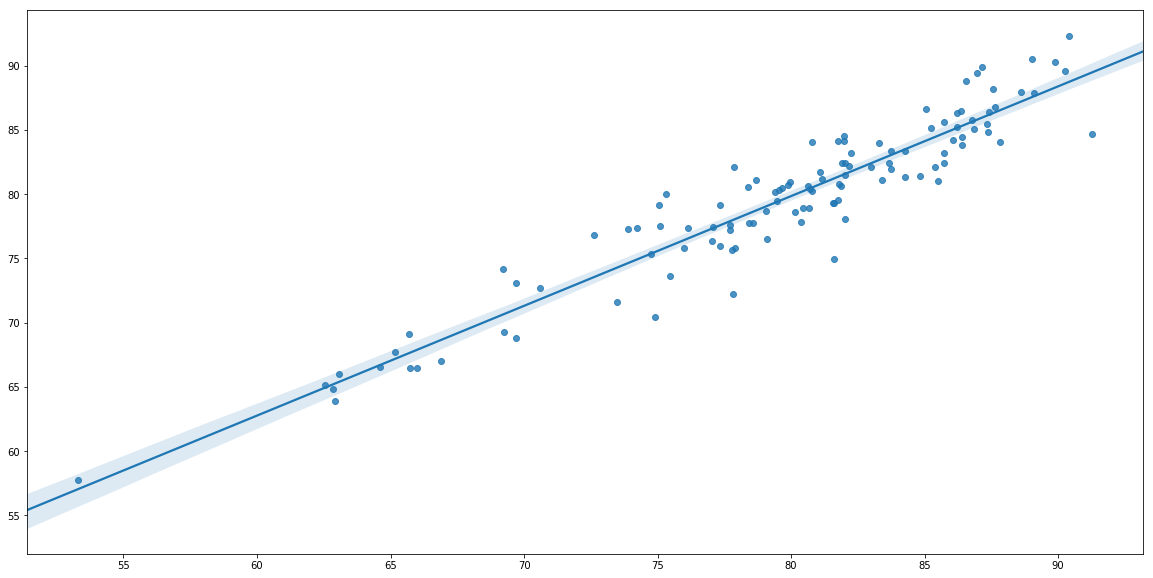

In [64]:
fig,ax = plt.subplots(figsize=(20,10))
sns.regplot(y_test, y_pred,ax=ax)

In [39]:
#['Month','ER_mean','ER_min','ER_max','ER_std','Variance','R2_score','MAE','MSE','MSLE','MedLE']
data_ur_erros.loc[3]=['Março',len(data_mean_mar),errors.mean(),errors.min(),errors.max(),errors.std(),variance,r2_score,MAE,MSE,MSLE,MedLE]
data_ur_erros

,Month,Qto_estacios,ER_mean,ER_min,ER_max,ER_std,Variance,R2_score,MAE,MSE,MSLE,MedLE
1,Janeiro,458,1.716204,0.040776,6.715789,1.366406,0.918698,0.918663,1.716204,4.812423,0.000848,1.590472
2,Fevereiro,458,1.500415,0.004587,5.763671,1.191684,0.906650,0.904846,1.500415,3.671357,0.000607,1.187216
3,Março,458,1.375574,0.011121,7.820064,1.186453,0.913549,0.911717,1.375574,3.299876,0.000525,1.171266


In [40]:
pickle.dump(mlp,open('../Models/URmax/urmax_3.model','wb'))

## Abril

In [41]:
data_mean_abr = pd.read_csv('../Dados/Brasil_4_mean.csv')

In [52]:
X_train, X_test, y_train, y_test = train_test_split(data_mean_abr[features_UR_wanderlay], 
                                                    data_mean_abr[target_wanderlay],test_size=.25)

scaler_x = MinMaxScaler(feature_range=(0,1))
scaler_y = MinMaxScaler(feature_range=(0,1))

scaler_x.fit(X_train)
X_train = scaler_x.transform(X_train)
X_test  = scaler_x.transform(X_test)

scaler_y.fit(y_train)
y_train = scaler_y.transform(y_train)
y_test  = scaler_y.transform(y_test)

mlp = MLPRegressor(hidden_layer_sizes=(2*len(features_UR_wanderlay)+1), activation='logistic', solver='lbfgs', alpha=0.0001, 
                  batch_size='auto',learning_rate='constant', learning_rate_init=0.09, power_t=0.5, max_iter=1000, shuffle=True, 
                   random_state=None, tol=0.0001, verbose=False, warm_start=False, momentum=0.9, nesterovs_momentum=True,
                   early_stopping=False, validation_fraction=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-08)

mlp = mlp.fit(X_train,y_train.ravel())
y_pred = mlp.predict(X_test)

y_test = scaler_y.inverse_transform(y_test).ravel()
y_pred = scaler_y.inverse_transform([y_pred,]).ravel()

variance = metrics.explained_variance_score(y_test,y_pred)
MAE = metrics.mean_absolute_error(y_test,y_pred)
MSE = metrics.mean_squared_error(y_test,y_pred)
MSLE = metrics.mean_squared_log_error(y_test,y_pred)
MedLE = metrics.median_absolute_error(y_test,y_pred)
r2_score = metrics.r2_score(y_test,y_pred)

print('Variance: {}'.format(variance))
print('MAE: {}'.format(MAE))
print('MSE: {}'.format(MSE))
print('MSLE: {}'.format(MSLE))
print('MedLE: {}'.format(MedLE))
print('R2 Score: {}'.format(r2_score))
errors=abs(y_test-y_pred)
print('\nError(UR_true - UR_pred)\n')
print('MIN: {} \nMAX: {} \nMEAN: {}\nStd: {}'.format(errors.min(),errors.max(),errors.mean(),errors.std()))

Variance: 0.8565857813854785
MAE: 1.6787712149900005
MSE: 5.16376786007264
MSLE: 0.0007828526805325245
MedLE: 1.4362848565566608
R2 Score: 0.850929488974712

Error(UR_true - UR_pred)

MIN: 0.013393991542471895 
MAX: 9.53012083295296 
MEAN: 1.6787712149900005
Std: 1.53150091994541


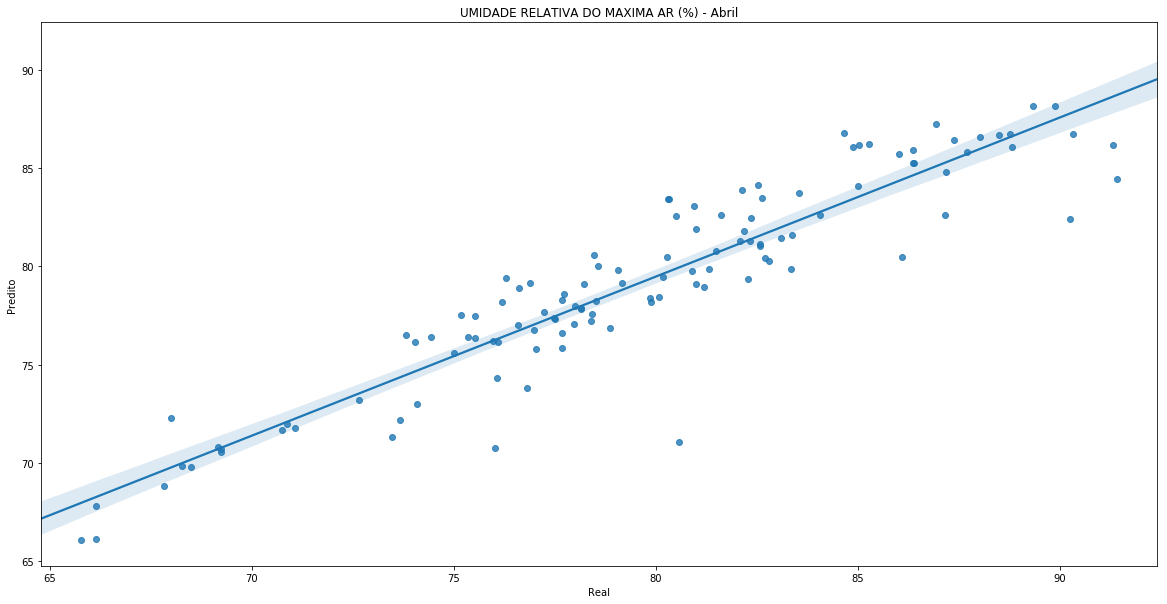

In [53]:
fig,ax = plt.subplots(figsize=(20,10))
sns.regplot(y_test, y_pred,ax=ax)
plt.xlim((min(y_test.min(),y_pred.min())-1,max(y_test.max(),y_pred.max())+1))
plt.ylim((min(y_test.min(),y_pred.min())-1,max(y_test.max(),y_pred.max())+1))
plt.xlabel('Real')
plt.ylabel('Predito')
plt.title( target_wanderlay[0] +' - Abril')
plt.savefig('../Validacao/graph/UR_max_abr.png')

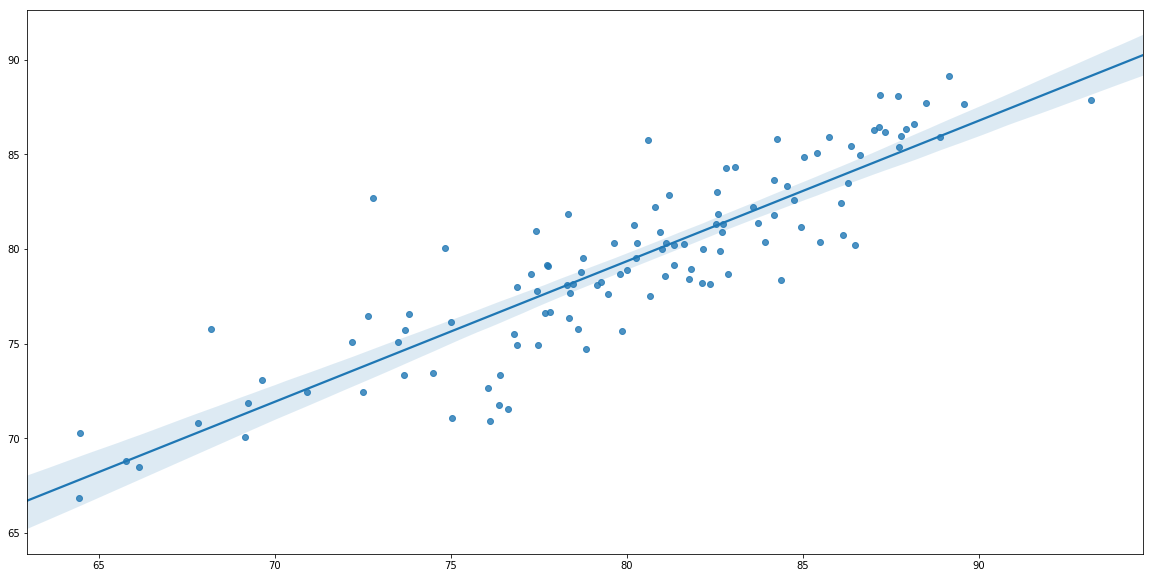

In [91]:
fig,ax = plt.subplots(figsize=(20,10))
sns.regplot(y_test, y_pred,ax=ax)

In [54]:
#['Month','ER_mean','ER_min','ER_max','ER_std','Variance','R2_score','MAE','MSE','MSLE','MedLE']
data_ur_erros.loc[4]=['Abril',len(data_mean_abr),errors.mean(),errors.min(),errors.max(),errors.std(),variance,r2_score,MAE,MSE,MSLE,MedLE]
data_ur_erros

,Month,Qto_estacios,ER_mean,ER_min,ER_max,ER_std,Variance,R2_score,MAE,MSE,MSLE,MedLE
1,Janeiro,458,1.716204,0.040776,6.715789,1.366406,0.918698,0.918663,1.716204,4.812423,0.000848,1.590472
2,Fevereiro,458,1.500415,0.004587,5.763671,1.191684,0.906650,0.904846,1.500415,3.671357,0.000607,1.187216
3,Março,458,1.375574,0.011121,7.820064,1.186453,0.913549,0.911717,1.375574,3.299876,0.000525,1.171266
4,Abril,461,1.678771,0.013394,9.530121,1.531501,0.856586,0.850929,1.678771,5.163768,0.000783,1.436285


In [55]:
pickle.dump(mlp,open('../Models/URmax/urmax_4.model','wb'))

## Maio

In [56]:
data_mean_mai = pd.read_csv('../Dados/Brasil_5_mean.csv')

In [63]:
X_train, X_test, y_train, y_test = train_test_split(data_mean_mai[features_UR_wanderlay], 
                                                    data_mean_mai[target_wanderlay],test_size=.25)

scaler_x = MinMaxScaler(feature_range=(0,1))
scaler_y = MinMaxScaler(feature_range=(0,1))

scaler_x.fit(X_train)
X_train = scaler_x.transform(X_train)
X_test  = scaler_x.transform(X_test)

scaler_y.fit(y_train)
y_train = scaler_y.transform(y_train)
y_test  = scaler_y.transform(y_test)

mlp = MLPRegressor(hidden_layer_sizes=(2*len(features_UR_wanderlay)+1), activation='logistic', solver='lbfgs', alpha=0.0001, 
                  batch_size='auto',learning_rate='constant', learning_rate_init=0.09, power_t=0.5, max_iter=1000, shuffle=True, 
                   random_state=None, tol=0.0001, verbose=False, warm_start=False, momentum=0.9, nesterovs_momentum=True,
                   early_stopping=False, validation_fraction=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-08)

mlp = mlp.fit(X_train,y_train.ravel())
y_pred = mlp.predict(X_test)

y_test = scaler_y.inverse_transform(y_test).ravel()
y_pred = scaler_y.inverse_transform([y_pred,]).ravel()

variance = metrics.explained_variance_score(y_test,y_pred)
MAE = metrics.mean_absolute_error(y_test,y_pred)
MSE = metrics.mean_squared_error(y_test,y_pred)
MSLE = metrics.mean_squared_log_error(y_test,y_pred)
MedLE = metrics.median_absolute_error(y_test,y_pred)
r2_score = metrics.r2_score(y_test,y_pred)

print('Variance: {}'.format(variance))
print('MAE: {}'.format(MAE))
print('MSE: {}'.format(MSE))
print('MSLE: {}'.format(MSLE))
print('MedLE: {}'.format(MedLE))
print('R2 Score: {}'.format(r2_score))
errors=abs(y_test-y_pred)
print('\nError(UR_true - UR_pred)\n')
print('MIN: {} \nMAX: {} \nMEAN: {}\nStd: {}'.format(errors.min(),errors.max(),errors.mean(),errors.std()))

Variance: 0.911701427464737
MAE: 1.7943871681824333
MSE: 4.663788077082802
MSLE: 0.0007946219226502849
MedLE: 1.5440169742859808
R2 Score: 0.9111789717324033

Error(UR_true - UR_pred)

MIN: 0.014388071348946596 
MAX: 5.102753509149039 
MEAN: 1.7943871681824333
Std: 1.201650018826209


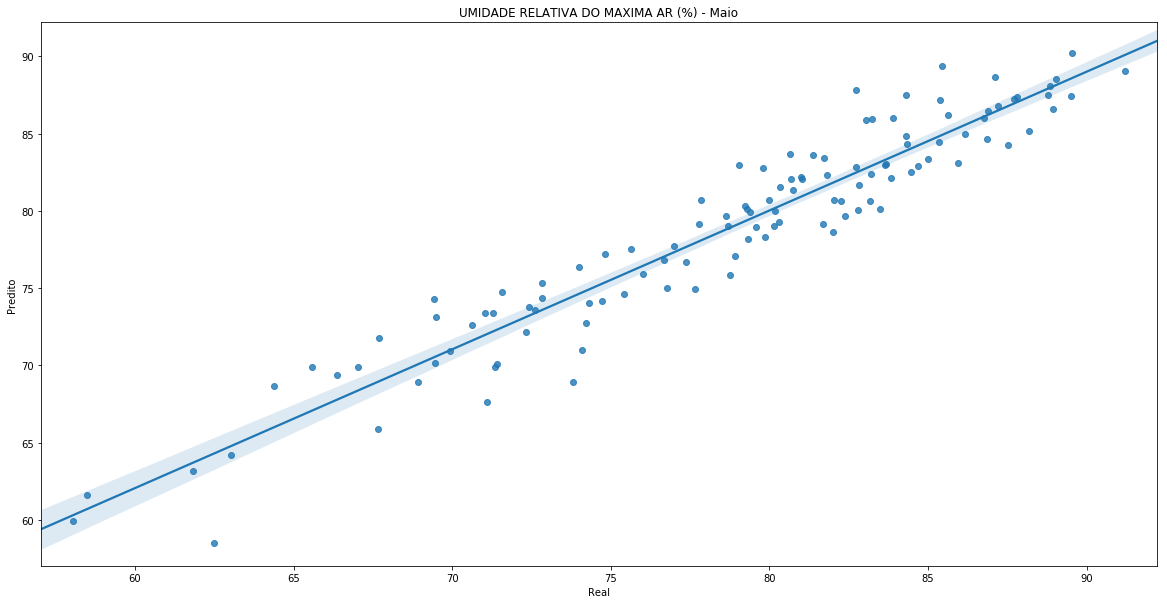

In [64]:
fig,ax = plt.subplots(figsize=(20,10))
sns.regplot(y_test, y_pred,ax=ax)
plt.xlim((min(y_test.min(),y_pred.min())-1,max(y_test.max(),y_pred.max())+1))
plt.ylim((min(y_test.min(),y_pred.min())-1,max(y_test.max(),y_pred.max())+1))
plt.xlabel('Real')
plt.ylabel('Predito')
plt.title( target_wanderlay[0] +' - Maio')
plt.savefig('../Validacao/graph/UR_max_mai.png')

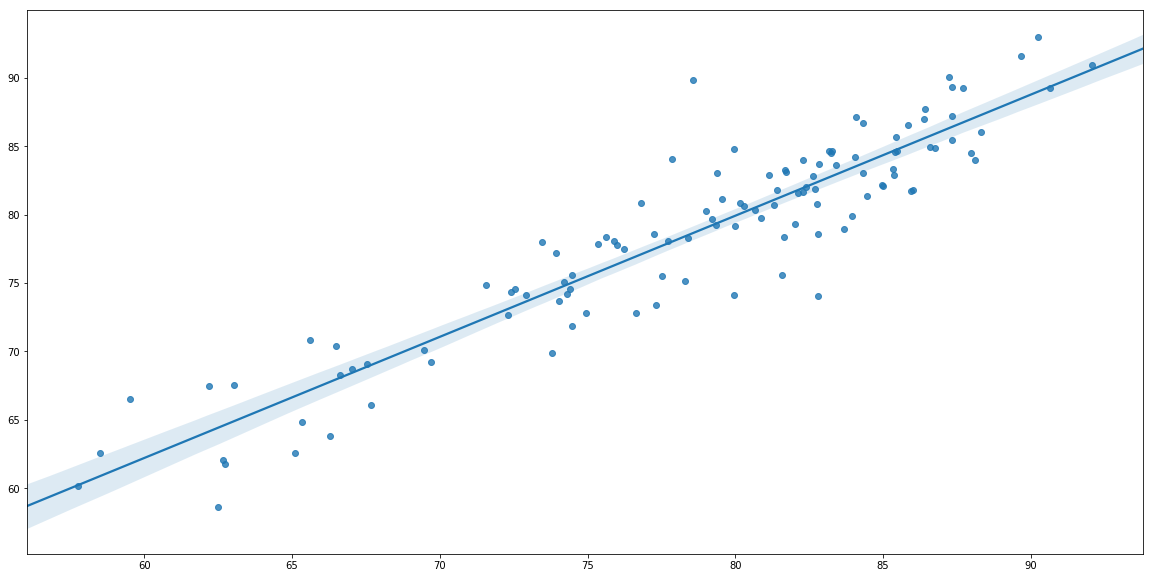

In [87]:
fig,ax = plt.subplots(figsize=(20,10))
sns.regplot(y_test, y_pred,ax=ax)

In [65]:
#['Month','ER_mean','ER_min','ER_max','ER_std','Variance','R2_score','MAE','MSE','MSLE','MedLE']
data_ur_erros.loc[5]=['Maio',len(data_mean_mai),errors.mean(),errors.min(),errors.max(),errors.std(),variance,r2_score,MAE,MSE,MSLE,MedLE]
data_ur_erros

,Month,Qto_estacios,ER_mean,ER_min,ER_max,ER_std,Variance,R2_score,MAE,MSE,MSLE,MedLE
1,Janeiro,458,1.716204,0.040776,6.715789,1.366406,0.918698,0.918663,1.716204,4.812423,0.000848,1.590472
2,Fevereiro,458,1.500415,0.004587,5.763671,1.191684,0.906650,0.904846,1.500415,3.671357,0.000607,1.187216
3,Março,458,1.375574,0.011121,7.820064,1.186453,0.913549,0.911717,1.375574,3.299876,0.000525,1.171266
4,Abril,461,1.678771,0.013394,9.530121,1.531501,0.856586,0.850929,1.678771,5.163768,0.000783,1.436285
5,Maio,461,1.794387,0.014388,5.102754,1.201650,0.911701,0.911179,1.794387,4.663788,0.000795,1.544017


In [66]:
pickle.dump(mlp,open('../Models/URmax/urmax_5.model','wb'))

## Junho

In [67]:
data_mean_jun = pd.read_csv('../Dados/Brasil_6_mean.csv')

In [78]:
X_train, X_test, y_train, y_test = train_test_split(data_mean_jun[features_UR_wanderlay], 
                                                    data_mean_jun[target_wanderlay],test_size=.25)

scaler_x = MinMaxScaler(feature_range=(0,1))
scaler_y = MinMaxScaler(feature_range=(0,1))

scaler_x.fit(X_train)
X_train = scaler_x.transform(X_train)
X_test  = scaler_x.transform(X_test)

scaler_y.fit(y_train)
y_train = scaler_y.transform(y_train)
y_test  = scaler_y.transform(y_test)

mlp = MLPRegressor(hidden_layer_sizes=(2*len(features_UR_wanderlay)+1), activation='logistic', solver='lbfgs', alpha=0.0001, 
                  batch_size='auto',learning_rate='constant', learning_rate_init=0.09, power_t=0.5, max_iter=1000, shuffle=True, 
                   random_state=None, tol=0.0001, verbose=False, warm_start=False, momentum=0.9, nesterovs_momentum=True,
                   early_stopping=False, validation_fraction=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-08)

mlp = mlp.fit(X_train,y_train.ravel())
y_pred = mlp.predict(X_test)

y_test = scaler_y.inverse_transform(y_test).ravel()
y_pred = scaler_y.inverse_transform([y_pred,]).ravel()

variance = metrics.explained_variance_score(y_test,y_pred)
MAE = metrics.mean_absolute_error(y_test,y_pred)
MSE = metrics.mean_squared_error(y_test,y_pred)
MSLE = metrics.mean_squared_log_error(y_test,y_pred)
MedLE = metrics.median_absolute_error(y_test,y_pred)
r2_score = metrics.r2_score(y_test,y_pred)

print('Variance: {}'.format(variance))
print('MAE: {}'.format(MAE))
print('MSE: {}'.format(MSE))
print('MSLE: {}'.format(MSLE))
print('MedLE: {}'.format(MedLE))
print('R2 Score: {}'.format(r2_score))
errors=abs(y_test-y_pred)
print('\nError(UR_true - UR_pred)\n')
print('MIN: {} \nMAX: {} \nMEAN: {}\nStd: {}'.format(errors.min(),errors.max(),errors.mean(),errors.std()))

Variance: 0.9353040516781304
MAE: 1.8811947378634655
MSE: 5.865117724830388
MSLE: 0.0010590497973879433
MedLE: 1.3568529986324336
R2 Score: 0.9349221857958263

Error(UR_true - UR_pred)

MIN: 0.007734970497430993 
MAX: 7.536218141369432 
MEAN: 1.8811947378634655
Std: 1.5251964080292075


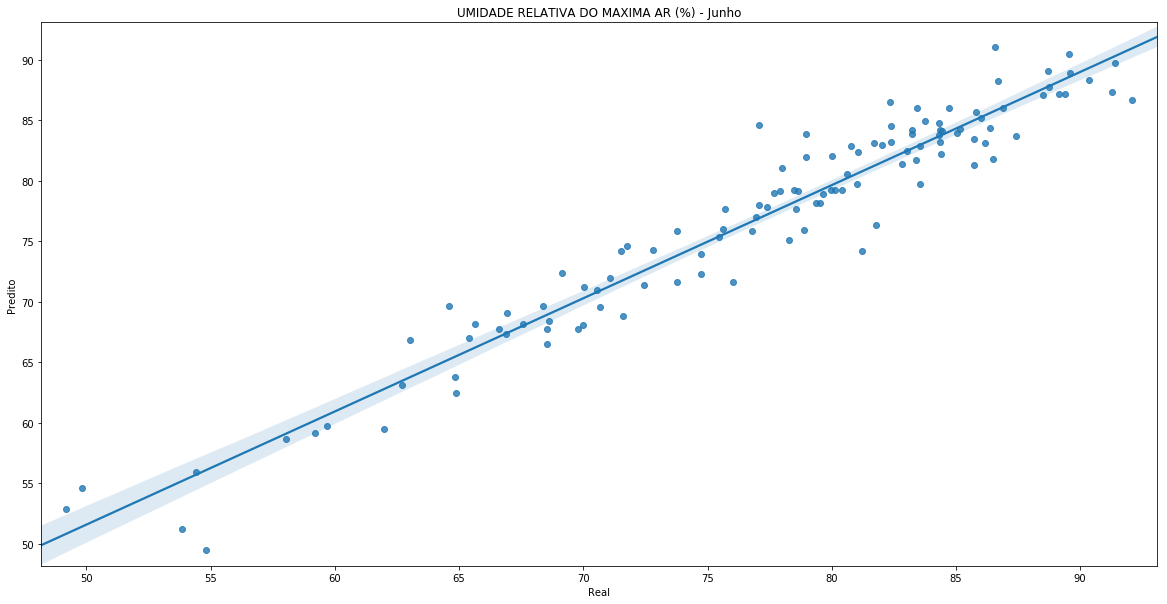

In [79]:
fig,ax = plt.subplots(figsize=(20,10))
sns.regplot(y_test, y_pred,ax=ax)
plt.xlim((min(y_test.min(),y_pred.min())-1,max(y_test.max(),y_pred.max())+1))
plt.ylim((min(y_test.min(),y_pred.min())-1,max(y_test.max(),y_pred.max())+1))
plt.xlabel('Real')
plt.ylabel('Predito')
plt.title( target_wanderlay[0] +' - Junho')
plt.savefig('../Validacao/graph/UR_max_jun.png')

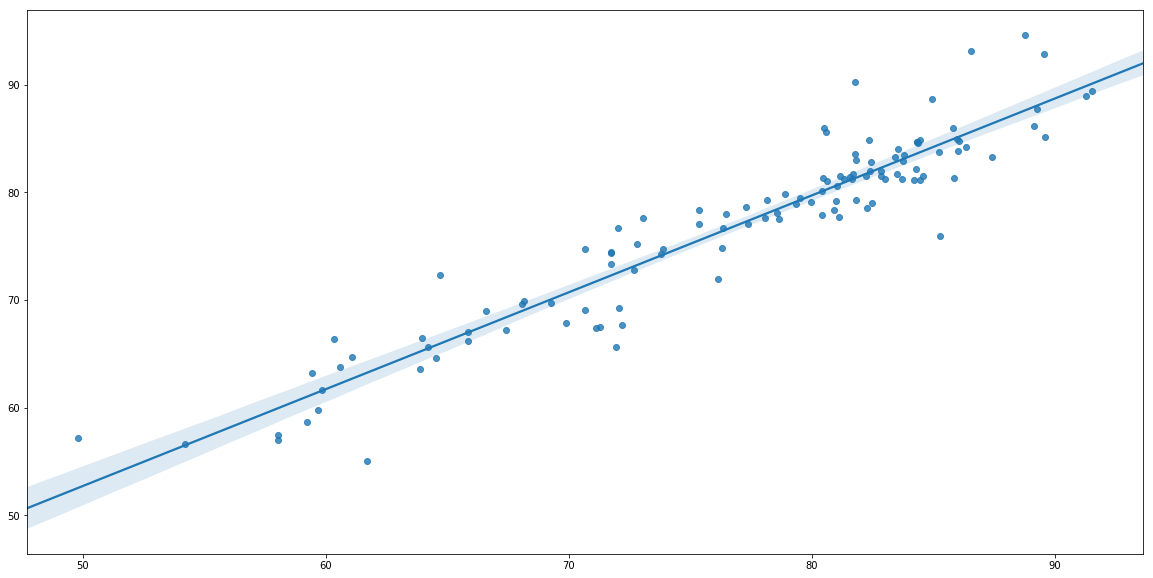

In [123]:
fig,ax = plt.subplots(figsize=(20,10))
sns.regplot(y_test, y_pred,ax=ax)

In [80]:
#['Month','ER_mean','ER_min','ER_max','ER_std','Variance','R2_score','MAE','MSE','MSLE','MedLE']
data_ur_erros.loc[6]=['Junho',len(data_mean_jun),errors.mean(),errors.min(),errors.max(),errors.std(),variance,r2_score,MAE,MSE,MSLE,MedLE]
data_ur_erros

,Month,Qto_estacios,ER_mean,ER_min,ER_max,ER_std,Variance,R2_score,MAE,MSE,MSLE,MedLE
1,Janeiro,458,1.716204,0.040776,6.715789,1.366406,0.918698,0.918663,1.716204,4.812423,0.000848,1.590472
2,Fevereiro,458,1.500415,0.004587,5.763671,1.191684,0.906650,0.904846,1.500415,3.671357,0.000607,1.187216
3,Março,458,1.375574,0.011121,7.820064,1.186453,0.913549,0.911717,1.375574,3.299876,0.000525,1.171266
4,Abril,461,1.678771,0.013394,9.530121,1.531501,0.856586,0.850929,1.678771,5.163768,0.000783,1.436285
5,Maio,461,1.794387,0.014388,5.102754,1.201650,0.911701,0.911179,1.794387,4.663788,0.000795,1.544017
6,Junho,467,1.881195,0.007735,7.536218,1.525196,0.935304,0.934922,1.881195,5.865118,0.001059,1.356853


In [81]:
pickle.dump(mlp,open('../Models/URmax/urmax_6.model','wb'))

## Julho

In [82]:
data_mean_jul = pd.read_csv('../Dados/Brasil_7_mean.csv')

In [93]:
X_train, X_test, y_train, y_test = train_test_split(data_mean_jul[features_UR_wanderlay], 
                                                    data_mean_jul[target_wanderlay],test_size=.25)

scaler_x = MinMaxScaler(feature_range=(0,1))
scaler_y = MinMaxScaler(feature_range=(0,1))

scaler_x.fit(X_train)
X_train = scaler_x.transform(X_train)
X_test  = scaler_x.transform(X_test)

scaler_y.fit(y_train)
y_train = scaler_y.transform(y_train)
y_test  = scaler_y.transform(y_test)

mlp = MLPRegressor(hidden_layer_sizes=(2*len(features_UR_wanderlay)+1), activation='logistic', solver='lbfgs', alpha=0.0001, 
                  batch_size='auto',learning_rate='constant', learning_rate_init=0.09, power_t=0.5, max_iter=1000, shuffle=True, 
                   random_state=None, tol=0.0001, verbose=False, warm_start=False, momentum=0.9, nesterovs_momentum=True,
                   early_stopping=False, validation_fraction=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-08)

mlp = mlp.fit(X_train,y_train.ravel())
y_pred = mlp.predict(X_test)

y_test = scaler_y.inverse_transform(y_test).ravel()
y_pred = scaler_y.inverse_transform([y_pred,]).ravel()

variance = metrics.explained_variance_score(y_test,y_pred)
MAE = metrics.mean_absolute_error(y_test,y_pred)
MSE = metrics.mean_squared_error(y_test,y_pred)
MSLE = metrics.mean_squared_log_error(y_test,y_pred)
MedLE = metrics.median_absolute_error(y_test,y_pred)
r2_score = metrics.r2_score(y_test,y_pred)

print('Variance: {}'.format(variance))
print('MAE: {}'.format(MAE))
print('MSE: {}'.format(MSE))
print('MSLE: {}'.format(MSLE))
print('MedLE: {}'.format(MedLE))
print('R2 Score: {}'.format(r2_score))
errors=abs(y_test-y_pred)
print('\nError(UR_true - UR_pred)\n')
print('MIN: {} \nMAX: {} \nMEAN: {}\nStd: {}'.format(errors.min(),errors.max(),errors.mean(),errors.std()))

Variance: 0.9580342581894564
MAE: 1.95379004714497
MSE: 5.951195026454275
MSLE: 0.0011556178773132182
MedLE: 1.6180627474686986
R2 Score: 0.9578975423637405

Error(UR_true - UR_pred)

MIN: 0.015396252766834095 
MAX: 7.900885125004677 
MEAN: 1.95379004714497
Std: 1.4607872802470356


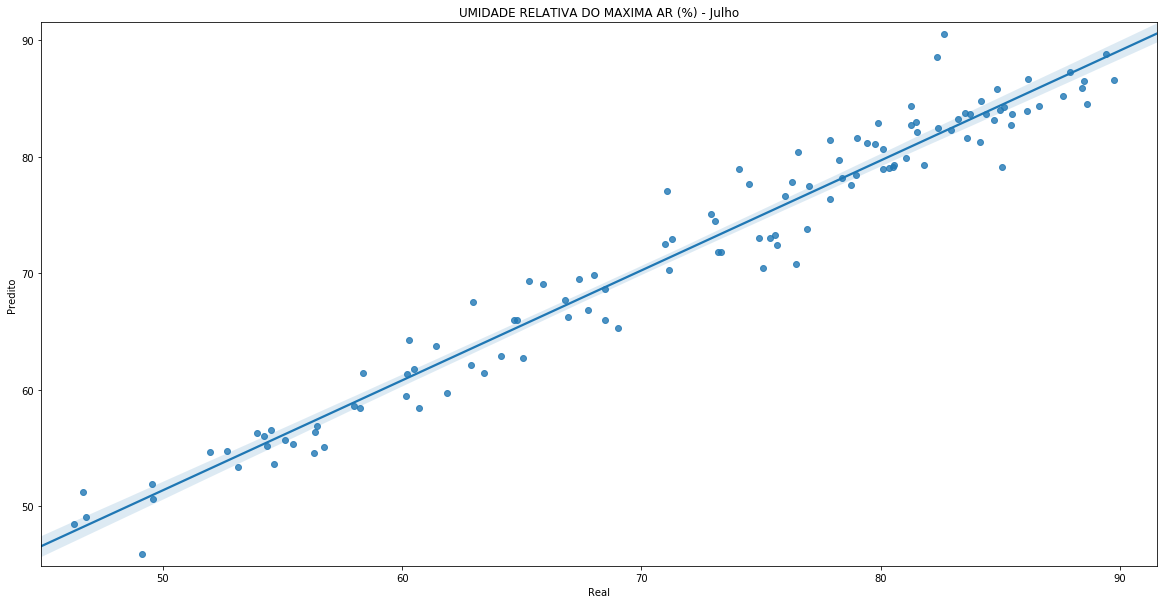

In [94]:
fig,ax = plt.subplots(figsize=(20,10))
sns.regplot(y_test, y_pred,ax=ax)
plt.xlim((min(y_test.min(),y_pred.min())-1,max(y_test.max(),y_pred.max())+1))
plt.ylim((min(y_test.min(),y_pred.min())-1,max(y_test.max(),y_pred.max())+1))
plt.xlabel('Real')
plt.ylabel('Predito')
plt.title( target_wanderlay[0] +' - Julho')
plt.savefig('../Validacao/graph/UR_max_jul.png')

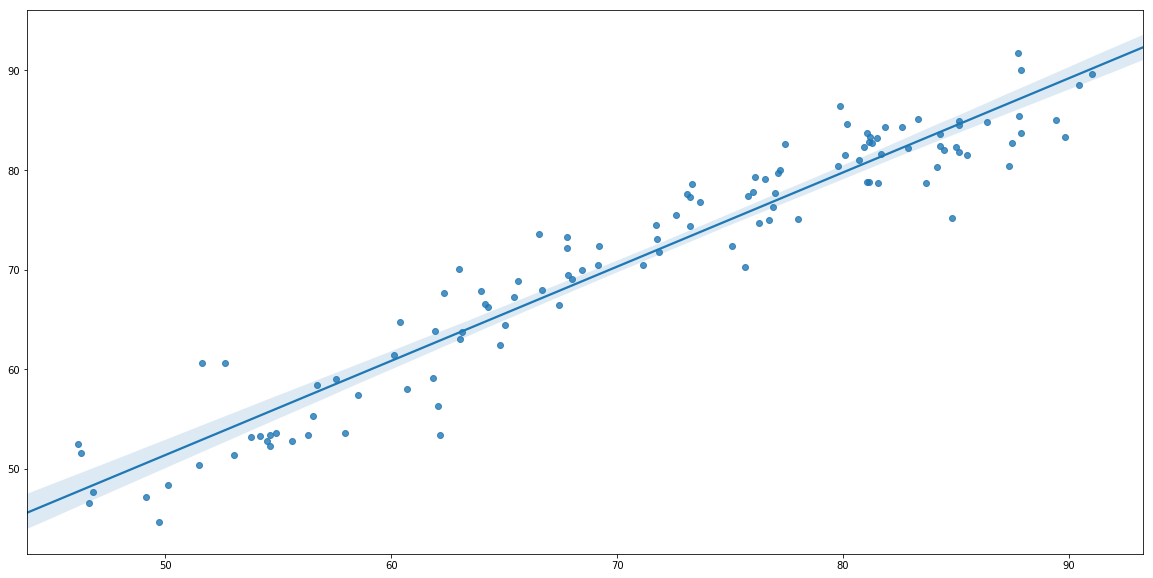

In [137]:
fig,ax = plt.subplots(figsize=(20,10))
sns.regplot(y_test, y_pred,ax=ax)

In [95]:
#['Month','ER_mean','ER_min','ER_max','ER_std','Variance','R2_score','MAE','MSE','MSLE','MedLE']
data_ur_erros.loc[7]=['Julho',len(data_mean_jul),errors.mean(),errors.min(),errors.max(),errors.std(),variance,r2_score,MAE,MSE,MSLE,MedLE]
data_ur_erros

,Month,Qto_estacios,ER_mean,ER_min,ER_max,ER_std,Variance,R2_score,MAE,MSE,MSLE,MedLE
1,Janeiro,458,1.716204,0.040776,6.715789,1.366406,0.918698,0.918663,1.716204,4.812423,0.000848,1.590472
2,Fevereiro,458,1.500415,0.004587,5.763671,1.191684,0.906650,0.904846,1.500415,3.671357,0.000607,1.187216
3,Março,458,1.375574,0.011121,7.820064,1.186453,0.913549,0.911717,1.375574,3.299876,0.000525,1.171266
4,Abril,461,1.678771,0.013394,9.530121,1.531501,0.856586,0.850929,1.678771,5.163768,0.000783,1.436285
5,Maio,461,1.794387,0.014388,5.102754,1.201650,0.911701,0.911179,1.794387,4.663788,0.000795,1.544017
6,Junho,467,1.881195,0.007735,7.536218,1.525196,0.935304,0.934922,1.881195,5.865118,0.001059,1.356853
7,Julho,467,1.953790,0.015396,7.900885,1.460787,0.958034,0.957898,1.953790,5.951195,0.001156,1.618063


In [98]:
pickle.dump(mlp,open('../Models/URmax/urmax_7.model','wb'))

## Agosto

In [3]:
data_mean_ago = pd.read_csv('../Dados/Brasil_8_mean.csv')

In [5]:
X_train, X_test, y_train, y_test = train_test_split(data_mean_ago[features_UR_wanderlay], 
                                                    data_mean_ago[target_wanderlay],test_size=.25)

scaler_x = MinMaxScaler(feature_range=(0,1))
scaler_y = MinMaxScaler(feature_range=(0,1))

scaler_x.fit(X_train)
X_train = scaler_x.transform(X_train)
X_test  = scaler_x.transform(X_test)

scaler_y.fit(y_train)
y_train = scaler_y.transform(y_train)
y_test  = scaler_y.transform(y_test)

mlp = MLPRegressor(hidden_layer_sizes=(2*len(features_UR_wanderlay)+1), activation='logistic', solver='lbfgs', alpha=0.0001, 
                  batch_size='auto',learning_rate='constant', learning_rate_init=0.09, power_t=0.5, max_iter=1000, shuffle=True, 
                   random_state=None, tol=0.0001, verbose=False, warm_start=False, momentum=0.9, nesterovs_momentum=True,
                   early_stopping=False, validation_fraction=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-08)

mlp = mlp.fit(X_train,y_train.ravel())
y_pred = mlp.predict(X_test)

y_test = scaler_y.inverse_transform(y_test).ravel()
y_pred = scaler_y.inverse_transform([y_pred,]).ravel()

variance = metrics.explained_variance_score(y_test,y_pred)
MAE = metrics.mean_absolute_error(y_test,y_pred)
MSE = metrics.mean_squared_error(y_test,y_pred)
MSLE = metrics.mean_squared_log_error(y_test,y_pred)
MedLE = metrics.median_absolute_error(y_test,y_pred)
r2_score = metrics.r2_score(y_test,y_pred)

print('Variance: {}'.format(variance))
print('MAE: {}'.format(MAE))
print('MSE: {}'.format(MSE))
print('MSLE: {}'.format(MSLE))
print('MedLE: {}'.format(MedLE))
print('R2 Score: {}'.format(r2_score))
errors=abs(y_test-y_pred)
print('\nError(UR_true - UR_pred)\n')
print('MIN: {} \nMAX: {} \nMEAN: {}\nStd: {}'.format(errors.min(),errors.max(),errors.mean(),errors.std()))

Variance: 0.961170915632372
MAE: 2.0409913112336664
MSE: 7.596917255447123
MSLE: 0.002469743765436863
MedLE: 1.5391907497457566
R2 Score: 0.9611465353461983

Error(UR_true - UR_pred)

MIN: 0.03101809061401184 
MAX: 11.025893864720082 
MEAN: 2.0409913112336664
Std: 1.8523692188426695


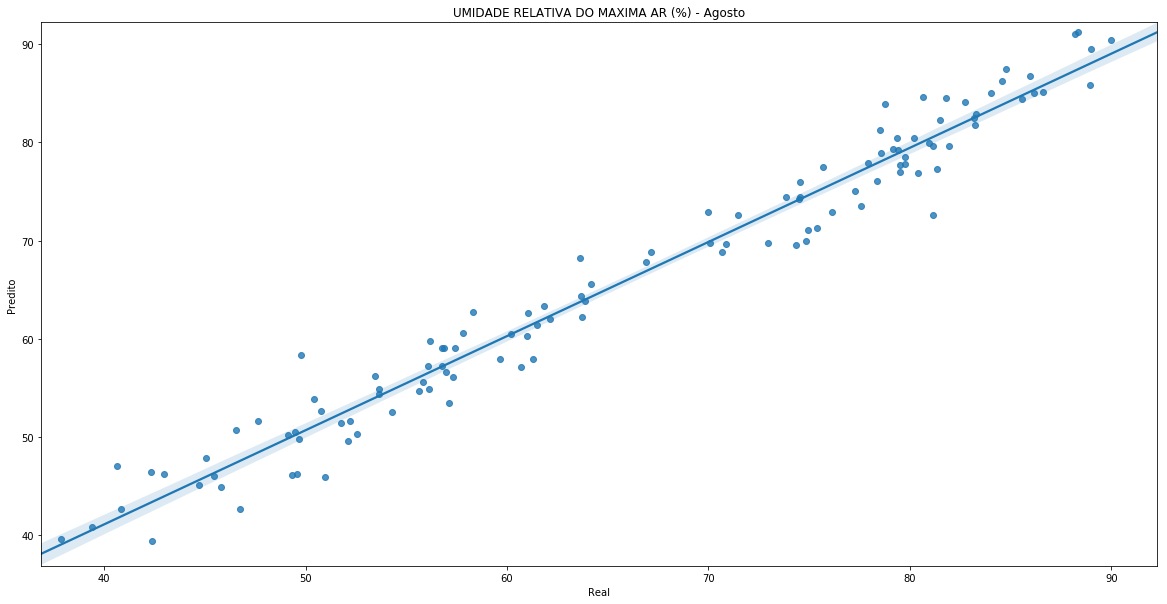

In [103]:
fig,ax = plt.subplots(figsize=(20,10))
sns.regplot(y_test, y_pred,ax=ax)
plt.xlim((min(y_test.min(),y_pred.min())-1,max(y_test.max(),y_pred.max())+1))
plt.ylim((min(y_test.min(),y_pred.min())-1,max(y_test.max(),y_pred.max())+1))
plt.xlabel('Real')
plt.ylabel('Predito')
plt.title( target_wanderlay[0] +' - Agosto')
plt.savefig('../Validacao/graph/UR_max_ago.png')

In [104]:
#['Month','ER_mean','ER_min','ER_max','ER_std','Variance','R2_score','MAE','MSE','MSLE','MedLE']
data_ur_erros.loc[8]=['Agosto',len(data_mean_ago),errors.mean(),errors.min(),errors.max(),errors.std(),variance,r2_score,MAE,MSE,MSLE,MedLE]
data_ur_erros

,Month,Qto_estacios,ER_mean,ER_min,ER_max,ER_std,Variance,R2_score,MAE,MSE,MSLE,MedLE
1,Janeiro,458,1.716204,0.040776,6.715789,1.366406,0.918698,0.918663,1.716204,4.812423,0.000848,1.590472
2,Fevereiro,458,1.500415,0.004587,5.763671,1.191684,0.906650,0.904846,1.500415,3.671357,0.000607,1.187216
3,Março,458,1.375574,0.011121,7.820064,1.186453,0.913549,0.911717,1.375574,3.299876,0.000525,1.171266
4,Abril,461,1.678771,0.013394,9.530121,1.531501,0.856586,0.850929,1.678771,5.163768,0.000783,1.436285
5,Maio,461,1.794387,0.014388,5.102754,1.201650,0.911701,0.911179,1.794387,4.663788,0.000795,1.544017
6,Junho,467,1.881195,0.007735,7.536218,1.525196,0.935304,0.934922,1.881195,5.865118,0.001059,1.356853
7,Julho,467,1.953790,0.015396,7.900885,1.460787,0.958034,0.957898,1.953790,5.951195,0.001156,1.618063
8,Agosto,468,2.069510,0.008877,8.626079,1.656189,0.966234,0.966233,2.069510,7.025831,0.001928,1.653197


In [6]:
pickle.dump(mlp,open('../Models/URmax/urmax_8.model','wb'))

## Setembro

In [106]:
data_mean_set = pd.read_csv('../Dados/Brasil_9_mean.csv')

In [155]:
X_train, X_test, y_train, y_test = train_test_split(data_mean_set[features_UR_wanderlay], 
                                                    data_mean_set[target_wanderlay],test_size=.25)

scaler_x = MinMaxScaler(feature_range=(0,1))
scaler_y = MinMaxScaler(feature_range=(0,1))

scaler_x.fit(X_train)
X_train = scaler_x.transform(X_train)
X_test  = scaler_x.transform(X_test)

scaler_y.fit(y_train)
y_train = scaler_y.transform(y_train)
y_test  = scaler_y.transform(y_test)

mlp = MLPRegressor(hidden_layer_sizes=(2*len(features_UR_wanderlay)+1), activation='logistic', solver='lbfgs', alpha=0.0001, 
                  batch_size='auto',learning_rate='constant', learning_rate_init=0.09, power_t=0.5, max_iter=1000, shuffle=True, 
                   random_state=None, tol=0.0001, verbose=False, warm_start=False, momentum=0.9, nesterovs_momentum=True,
                   early_stopping=False, validation_fraction=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-08)

mlp = mlp.fit(X_train,y_train.ravel())
y_pred = mlp.predict(X_test)

y_test = scaler_y.inverse_transform(y_test).ravel()
y_pred = scaler_y.inverse_transform([y_pred,]).ravel()

variance = metrics.explained_variance_score(y_test,y_pred)
MAE = metrics.mean_absolute_error(y_test,y_pred)
MSE = metrics.mean_squared_error(y_test,y_pred)
MSLE = metrics.mean_squared_log_error(y_test,y_pred)
MedLE = metrics.median_absolute_error(y_test,y_pred)
r2_score = metrics.r2_score(y_test,y_pred)

print('Variance: {}'.format(variance))
print('MAE: {}'.format(MAE))
print('MSE: {}'.format(MSE))
print('MSLE: {}'.format(MSLE))
print('MedLE: {}'.format(MedLE))
print('R2 Score: {}'.format(r2_score))
errors=abs(y_test-y_pred)
print('\nError(UR_true - UR_pred)\n')
print('MIN: {} \nMAX: {} \nMEAN: {}\nStd: {}'.format(errors.min(),errors.max(),errors.mean(),errors.std()))

Variance: 0.965677081430524
MAE: 1.9043765918263444
MSE: 6.064519751903933
MSLE: 0.0018695858803018687
MedLE: 1.425431368447228
R2 Score: 0.9655673132366319

Error(UR_true - UR_pred)

MIN: 0.02825099872954695 
MAX: 6.518144676587546 
MEAN: 1.9043765918263444
Std: 1.5613678453227502


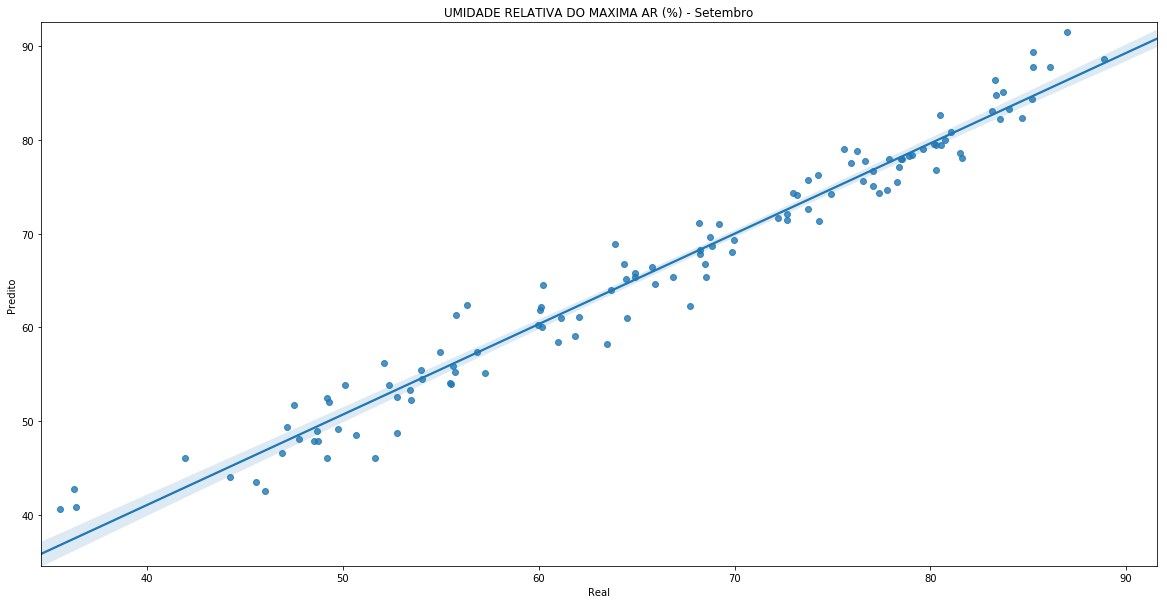

In [157]:
fig,ax = plt.subplots(figsize=(20,10))
sns.regplot(y_test, y_pred,ax=ax)
plt.xlim((min(y_test.min(),y_pred.min())-1,max(y_test.max(),y_pred.max())))
plt.ylim((min(y_test.min(),y_pred.min())-1,max(y_test.max(),y_pred.max())+1))
plt.xlabel('Real')
plt.ylabel('Predito')
plt.title( target_wanderlay[0] +' - Setembro')
plt.savefig('../Validacao/graph/UR_max_set.png')

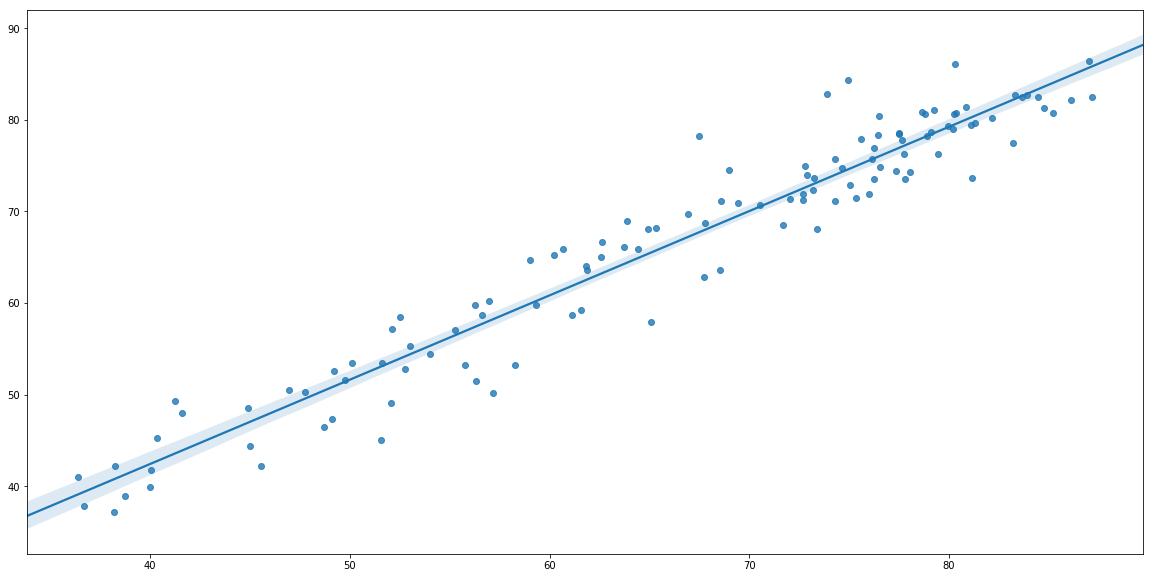

In [160]:
fig,ax = plt.subplots(figsize=(20,10))
sns.regplot(y_test, y_pred,ax=ax)

In [158]:
#['Month','ER_mean','ER_min','ER_max','ER_std','Variance','R2_score','MAE','MSE','MSLE','MedLE']
data_ur_erros.loc[9]=['Setembro',len(data_mean_set),errors.mean(),errors.min(),errors.max(),errors.std(),variance,r2_score,MAE,MSE,MSLE,MedLE]
data_ur_erros

,Month,Qto_estacios,ER_mean,ER_min,ER_max,ER_std,Variance,R2_score,MAE,MSE,MSLE,MedLE
1,Janeiro,458,1.716204,0.040776,6.715789,1.366406,0.918698,0.918663,1.716204,4.812423,0.000848,1.590472
2,Fevereiro,458,1.500415,0.004587,5.763671,1.191684,0.906650,0.904846,1.500415,3.671357,0.000607,1.187216
3,Março,458,1.375574,0.011121,7.820064,1.186453,0.913549,0.911717,1.375574,3.299876,0.000525,1.171266
4,Abril,461,1.678771,0.013394,9.530121,1.531501,0.856586,0.850929,1.678771,5.163768,0.000783,1.436285
5,Maio,461,1.794387,0.014388,5.102754,1.201650,0.911701,0.911179,1.794387,4.663788,0.000795,1.544017
6,Junho,467,1.881195,0.007735,7.536218,1.525196,0.935304,0.934922,1.881195,5.865118,0.001059,1.356853
7,Julho,467,1.953790,0.015396,7.900885,1.460787,0.958034,0.957898,1.953790,5.951195,0.001156,1.618063
8,Agosto,468,2.069510,0.008877,8.626079,1.656189,0.966234,0.966233,2.069510,7.025831,0.001928,1.653197
9,Setembro,470,1.904377,0.028251,6.518145,1.561368,0.965677,0.965567,1.904377,6.064520,0.001870,1.425431
10,Outubro,458,1.591210,0.028863,6.806169,1.311064,0.965273,0.965076,1.591210,4.250840,0.000993,1.278462


In [159]:
pickle.dump(mlp,open('../Models/URmax/urmax_9.model','wb'))

## Outubro

In [24]:
data_mean_out = pd.read_csv('../Dados/Brasil_10_mean.csv')

In [28]:
X_train, X_test, y_train, y_test = train_test_split(data_mean_out[features_UR_wanderlay], 
                                                    data_mean_out[target_wanderlay],test_size=.25)

scaler_x = MinMaxScaler(feature_range=(0,1))
scaler_y = MinMaxScaler(feature_range=(0,1))

scaler_x.fit(X_train)
X_train = scaler_x.transform(X_train)
X_test  = scaler_x.transform(X_test)

scaler_y.fit(y_train)
y_train = scaler_y.transform(y_train)
y_test  = scaler_y.transform(y_test)

mlp = MLPRegressor(hidden_layer_sizes=(2*len(features_UR_wanderlay)+1), activation='logistic', solver='lbfgs', alpha=0.0001, 
                  batch_size='auto',learning_rate='constant', learning_rate_init=0.09, power_t=0.5, max_iter=1000, shuffle=True, 
                   random_state=None, tol=0.0001, verbose=False, warm_start=False, momentum=0.9, nesterovs_momentum=True,
                   early_stopping=False, validation_fraction=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-08)

mlp = mlp.fit(X_train,y_train.ravel())
y_pred = mlp.predict(X_test)

y_test = scaler_y.inverse_transform(y_test).ravel()
y_pred = scaler_y.inverse_transform([y_pred,]).ravel()

variance = metrics.explained_variance_score(y_test,y_pred)
MAE = metrics.mean_absolute_error(y_test,y_pred)
MSE = metrics.mean_squared_error(y_test,y_pred)
MSLE = metrics.mean_squared_log_error(y_test,y_pred)
MedLE = metrics.median_absolute_error(y_test,y_pred)
r2_score = metrics.r2_score(y_test,y_pred)

print('Variance: {}'.format(variance))
print('MAE: {}'.format(MAE))
print('MSE: {}'.format(MSE))
print('MSLE: {}'.format(MSLE))
print('MedLE: {}'.format(MedLE))
print('R2 Score: {}'.format(r2_score))
errors=abs(y_test-y_pred)
print('\nError(UR_true - UR_pred)\n')
print('MIN: {} \nMAX: {} \nMEAN: {}\nStd: {}'.format(errors.min(),errors.max(),errors.mean(),errors.std()))

Variance: 0.96017200152024
MAE: 1.6466068460645877
MSE: 4.772009076416681
MSLE: 0.0011511431457373706
MedLE: 1.2148198024820829
R2 Score: 0.960039391245255

Error(UR_true - UR_pred)

MIN: 0.009944230754769023 
MAX: 7.089824678301952 
MEAN: 1.6466068460645877
Std: 1.4355120936132555


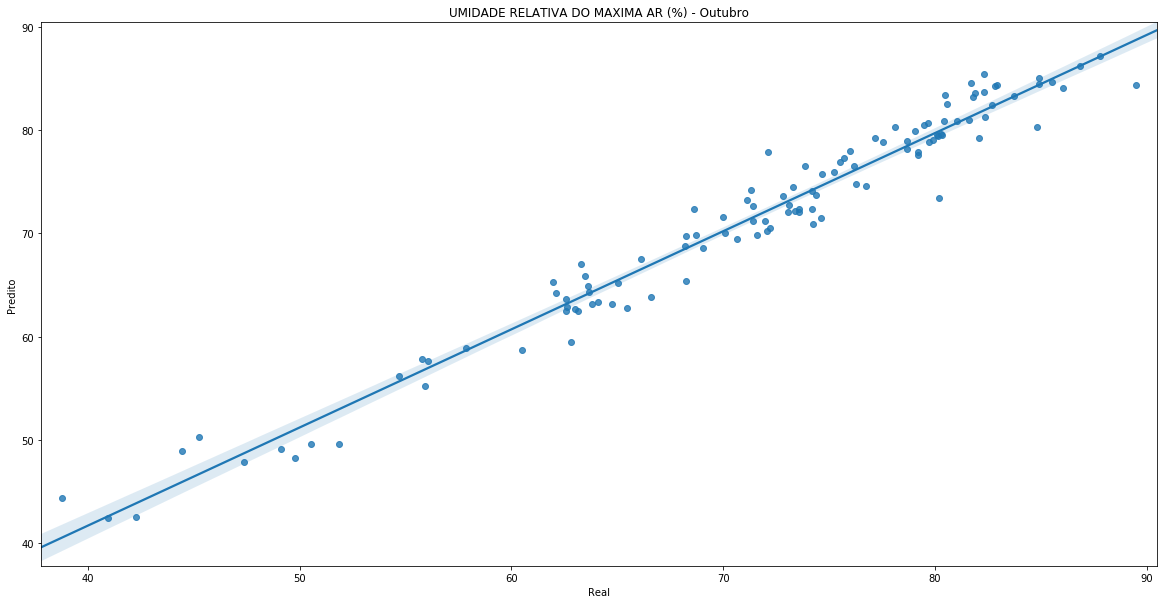

In [116]:
fig,ax = plt.subplots(figsize=(20,10))
sns.regplot(y_test, y_pred,ax=ax)
plt.xlim((min(y_test.min(),y_pred.min())-1,max(y_test.max(),y_pred.max())+1))
plt.ylim((min(y_test.min(),y_pred.min())-1,max(y_test.max(),y_pred.max())+1))
plt.xlabel('Real')
plt.ylabel('Predito')
plt.title( target_wanderlay[0] +' - Outubro')
plt.savefig('../Validacao/graph/UR_max_out.png')

In [117]:
#['Month','ER_mean','ER_min','ER_max','ER_std','Variance','R2_score','MAE','MSE','MSLE','MedLE']
data_ur_erros.loc[10]=['Outubro',len(data_mean_out),errors.mean(),errors.min(),errors.max(),errors.std(),variance,r2_score,MAE,MSE,MSLE,MedLE]
data_ur_erros

,Month,Qto_estacios,ER_mean,ER_min,ER_max,ER_std,Variance,R2_score,MAE,MSE,MSLE,MedLE
1,Janeiro,458,1.716204,0.040776,6.715789,1.366406,0.918698,0.918663,1.716204,4.812423,0.000848,1.590472
2,Fevereiro,458,1.500415,0.004587,5.763671,1.191684,0.906650,0.904846,1.500415,3.671357,0.000607,1.187216
3,Março,458,1.375574,0.011121,7.820064,1.186453,0.913549,0.911717,1.375574,3.299876,0.000525,1.171266
4,Abril,461,1.678771,0.013394,9.530121,1.531501,0.856586,0.850929,1.678771,5.163768,0.000783,1.436285
5,Maio,461,1.794387,0.014388,5.102754,1.201650,0.911701,0.911179,1.794387,4.663788,0.000795,1.544017
6,Junho,467,1.881195,0.007735,7.536218,1.525196,0.935304,0.934922,1.881195,5.865118,0.001059,1.356853
7,Julho,467,1.953790,0.015396,7.900885,1.460787,0.958034,0.957898,1.953790,5.951195,0.001156,1.618063
8,Agosto,468,2.069510,0.008877,8.626079,1.656189,0.966234,0.966233,2.069510,7.025831,0.001928,1.653197
9,Setembro,470,2.079570,0.002782,10.615178,1.931749,0.954651,0.954634,2.079570,8.056265,0.002412,1.528582
10,Outubro,458,1.591210,0.028863,6.806169,1.311064,0.965273,0.965076,1.591210,4.250840,0.000993,1.278462


In [29]:
pickle.dump(mlp,open('../Models/URmax/urmax_10.model','wb'))

## Novembro

In [7]:
data_mean_nov = pd.read_csv('../Dados/Brasil_11_mean.csv')

In [22]:
X_train, X_test, y_train, y_test = train_test_split(data_mean_nov[features_UR_wanderlay], 
                                                    data_mean_nov[target_wanderlay],test_size=.25)

scaler_x = MinMaxScaler(feature_range=(0,1))
scaler_y = MinMaxScaler(feature_range=(0,1))

scaler_x.fit(X_train)
X_train = scaler_x.transform(X_train)
X_test  = scaler_x.transform(X_test)

scaler_y.fit(y_train)
y_train = scaler_y.transform(y_train)
y_test  = scaler_y.transform(y_test)

mlp = MLPRegressor(hidden_layer_sizes=(2*len(features_UR_wanderlay)+1), activation='logistic', solver='lbfgs', alpha=0.0001, 
                  batch_size='auto',learning_rate='constant', learning_rate_init=0.09, power_t=0.5, max_iter=1000, shuffle=True, 
                   random_state=None, tol=0.0001, verbose=False, warm_start=False, momentum=0.9, nesterovs_momentum=True,
                   early_stopping=False, validation_fraction=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-08)

mlp = mlp.fit(X_train,y_train.ravel())
y_pred = mlp.predict(X_test)

y_test = scaler_y.inverse_transform(y_test).ravel()
y_pred = scaler_y.inverse_transform([y_pred,]).ravel()

variance = metrics.explained_variance_score(y_test,y_pred)
MAE = metrics.mean_absolute_error(y_test,y_pred)
MSE = metrics.mean_squared_error(y_test,y_pred)
MSLE = metrics.mean_squared_log_error(y_test,y_pred)
MedLE = metrics.median_absolute_error(y_test,y_pred)
r2_score = metrics.r2_score(y_test,y_pred)

print('Variance: {}'.format(variance))
print('MAE: {}'.format(MAE))
print('MSE: {}'.format(MSE))
print('MSLE: {}'.format(MSLE))
print('MedLE: {}'.format(MedLE))
print('R2 Score: {}'.format(r2_score))
errors=abs(y_test-y_pred)
print('\nError(UR_true - UR_pred)\n')
print('MIN: {} \nMAX: {} \nMEAN: {}\nStd: {}'.format(errors.min(),errors.max(),errors.mean(),errors.std()))

Variance: 0.9405951264597182
MAE: 1.691797044555623
MSE: 4.695127464978562
MSLE: 0.0008257772985893323
MedLE: 1.524121296189719
R2 Score: 0.9391519717179173

Error(UR_true - UR_pred)

MIN: 0.02135427878444318 
MAX: 6.73497027007609 
MEAN: 1.691797044555623
Std: 1.353864921257443


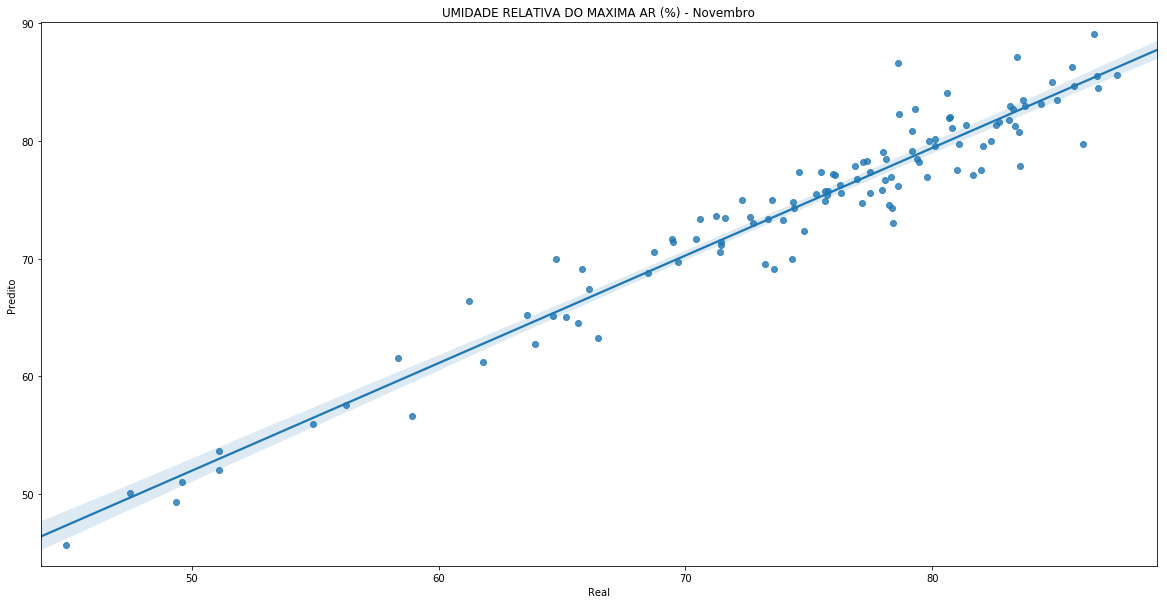

In [149]:
fig,ax = plt.subplots(figsize=(20,10))
sns.regplot(y_test, y_pred,ax=ax)
plt.xlim((min(y_test.min(),y_pred.min())-1,max(y_test.max(),y_pred.max())))
plt.ylim((min(y_test.min(),y_pred.min())-1,max(y_test.max(),y_pred.max())+1))
plt.xlabel('Real')
plt.ylabel('Predito')
plt.title( target_wanderlay[0] +' - Novembro')
plt.savefig('../Validacao/graph/UR_max_nov.png')

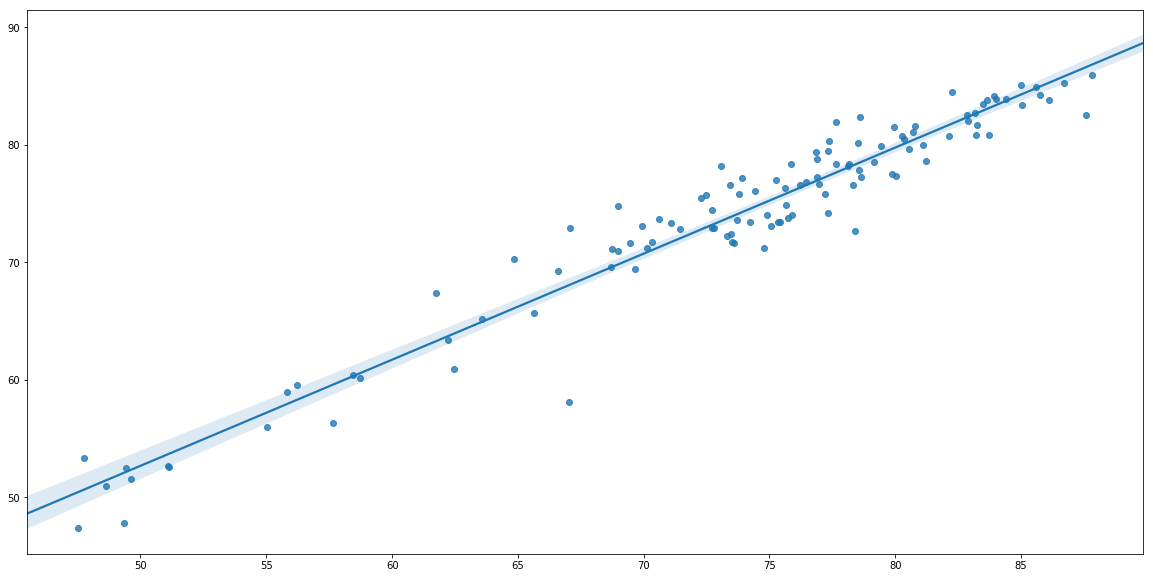

In [124]:
fig,ax = plt.subplots(figsize=(20,10))
sns.regplot(y_test, y_pred,ax=ax)

In [150]:
#['Month','ER_mean','ER_min','ER_max','ER_std','Variance','R2_score','MAE','MSE','MSLE','MedLE']
data_ur_erros.loc[11]=['Novembro',len(data_mean_nov),errors.mean(),errors.min(),errors.max(),errors.std(),variance,r2_score,MAE,MSE,MSLE,MedLE]
data_ur_erros

,Month,Qto_estacios,ER_mean,ER_min,ER_max,ER_std,Variance,R2_score,MAE,MSE,MSLE,MedLE
1,Janeiro,458,1.716204,0.040776,6.715789,1.366406,0.918698,0.918663,1.716204,4.812423,0.000848,1.590472
2,Fevereiro,458,1.500415,0.004587,5.763671,1.191684,0.906650,0.904846,1.500415,3.671357,0.000607,1.187216
3,Março,458,1.375574,0.011121,7.820064,1.186453,0.913549,0.911717,1.375574,3.299876,0.000525,1.171266
4,Abril,461,1.678771,0.013394,9.530121,1.531501,0.856586,0.850929,1.678771,5.163768,0.000783,1.436285
5,Maio,461,1.794387,0.014388,5.102754,1.201650,0.911701,0.911179,1.794387,4.663788,0.000795,1.544017
6,Junho,467,1.881195,0.007735,7.536218,1.525196,0.935304,0.934922,1.881195,5.865118,0.001059,1.356853
7,Julho,467,1.953790,0.015396,7.900885,1.460787,0.958034,0.957898,1.953790,5.951195,0.001156,1.618063
8,Agosto,468,2.069510,0.008877,8.626079,1.656189,0.966234,0.966233,2.069510,7.025831,0.001928,1.653197
9,Setembro,470,2.079570,0.002782,10.615178,1.931749,0.954651,0.954634,2.079570,8.056265,0.002412,1.528582
10,Outubro,458,1.591210,0.028863,6.806169,1.311064,0.965273,0.965076,1.591210,4.250840,0.000993,1.278462


In [23]:
pickle.dump(mlp,open('../Models/URmax/urmax_11.model','wb'))

## Dezembro

In [127]:
data_mean_dez = pd.read_csv('../Dados/Brasil_12_mean.csv')

In [130]:
X_train, X_test, y_train, y_test = train_test_split(data_mean_dez[features_UR_wanderlay], 
                                                    data_mean_dez[target_wanderlay],test_size=.25)

scaler_x = MinMaxScaler(feature_range=(0,1))
scaler_y = MinMaxScaler(feature_range=(0,1))

scaler_x.fit(X_train)
X_train = scaler_x.transform(X_train)
X_test  = scaler_x.transform(X_test)

scaler_y.fit(y_train)
y_train = scaler_y.transform(y_train)
y_test  = scaler_y.transform(y_test)

mlp = MLPRegressor(hidden_layer_sizes=(2*len(features_UR_wanderlay)+1), activation='logistic', solver='lbfgs', alpha=0.0001, 
                  batch_size='auto',learning_rate='constant', learning_rate_init=0.09, power_t=0.5, max_iter=1000, shuffle=True, 
                   random_state=None, tol=0.0001, verbose=False, warm_start=False, momentum=0.9, nesterovs_momentum=True,
                   early_stopping=False, validation_fraction=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-08)

mlp = mlp.fit(X_train,y_train.ravel())
y_pred = mlp.predict(X_test)

y_test = scaler_y.inverse_transform(y_test).ravel()
y_pred = scaler_y.inverse_transform([y_pred,]).ravel()

variance = metrics.explained_variance_score(y_test,y_pred)
MAE = metrics.mean_absolute_error(y_test,y_pred)
MSE = metrics.mean_squared_error(y_test,y_pred)
MSLE = metrics.mean_squared_log_error(y_test,y_pred)
MedLE = metrics.median_absolute_error(y_test,y_pred)
r2_score = metrics.r2_score(y_test,y_pred)

print('Variance: {}'.format(variance))
print('MAE: {}'.format(MAE))
print('MSE: {}'.format(MSE))
print('MSLE: {}'.format(MSLE))
print('MedLE: {}'.format(MedLE))
print('R2 Score: {}'.format(r2_score))
errors=abs(y_test-y_pred)
print('\nError(UR_true - UR_pred)\n')
print('MIN: {} \nMAX: {} \nMEAN: {}\nStd: {}'.format(errors.min(),errors.max(),errors.mean(),errors.std()))

Variance: 0.9267144919035963
MAE: 1.6998960643880197
MSE: 4.62821294964868
MSLE: 0.0008422879202795174
MedLE: 1.3667509321030167
R2 Score: 0.9253707497148291

Error(UR_true - UR_pred)

MIN: 0.02079551513806166 
MAX: 5.494240756227086 
MEAN: 1.6998960643880197
Std: 1.3185470488104711


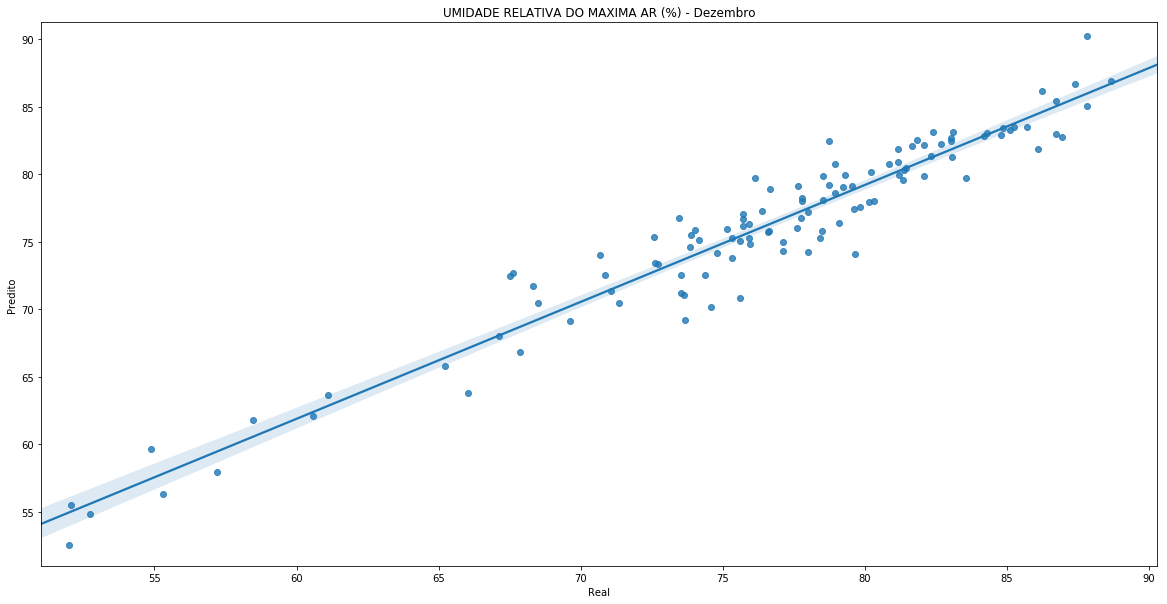

In [132]:
fig,ax = plt.subplots(figsize=(20,10))
sns.regplot(y_test, y_pred,ax=ax)
plt.xlim((min(y_test.min(),y_pred.min())-1,max(y_test.max(),y_pred.max())))
plt.ylim((min(y_test.min(),y_pred.min())-1,max(y_test.max(),y_pred.max())+1))
plt.xlabel('Real')
plt.ylabel('Predito')
plt.title( target_wanderlay[0] +' - Dezembro')
plt.savefig('../Validacao/graph/UR_max_dez.png')

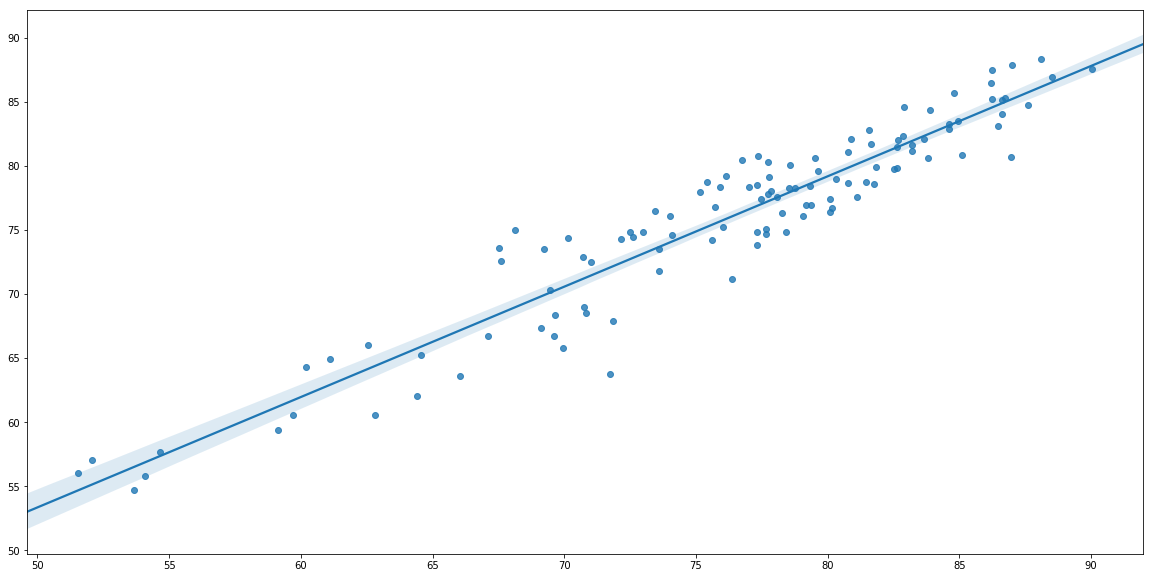

In [214]:
fig,ax = plt.subplots(figsize=(20,10))
sns.regplot(y_test, y_pred,ax=ax)

In [133]:
#['Month','ER_mean','ER_min','ER_max','ER_std','Variance','R2_score','MAE','MSE','MSLE','MedLE']
data_ur_erros.loc[12]=['Dezembro',len(data_mean_dez),errors.mean(),errors.min(),errors.max(),errors.std(),variance,r2_score,MAE,MSE,MSLE,MedLE]
data_ur_erros

,Month,Qto_estacios,ER_mean,ER_min,ER_max,ER_std,Variance,R2_score,MAE,MSE,MSLE,MedLE
1,Janeiro,458,1.716204,0.040776,6.715789,1.366406,0.918698,0.918663,1.716204,4.812423,0.000848,1.590472
2,Fevereiro,458,1.500415,0.004587,5.763671,1.191684,0.906650,0.904846,1.500415,3.671357,0.000607,1.187216
3,Março,458,1.375574,0.011121,7.820064,1.186453,0.913549,0.911717,1.375574,3.299876,0.000525,1.171266
4,Abril,461,1.678771,0.013394,9.530121,1.531501,0.856586,0.850929,1.678771,5.163768,0.000783,1.436285
5,Maio,461,1.794387,0.014388,5.102754,1.201650,0.911701,0.911179,1.794387,4.663788,0.000795,1.544017
6,Junho,467,1.881195,0.007735,7.536218,1.525196,0.935304,0.934922,1.881195,5.865118,0.001059,1.356853
7,Julho,467,1.953790,0.015396,7.900885,1.460787,0.958034,0.957898,1.953790,5.951195,0.001156,1.618063
8,Agosto,468,2.069510,0.008877,8.626079,1.656189,0.966234,0.966233,2.069510,7.025831,0.001928,1.653197
9,Setembro,470,2.079570,0.002782,10.615178,1.931749,0.954651,0.954634,2.079570,8.056265,0.002412,1.528582
10,Outubro,458,1.591210,0.028863,6.806169,1.311064,0.965273,0.965076,1.591210,4.250840,0.000993,1.278462


In [134]:
pickle.dump(mlp,open('../Models/URmax/urmax_12.model','wb'))

### Salvando as mestricas de avaliação

In [161]:
data_ur_erros['std_target'] = [data_mean_jan[target_wanderlay].std()[0],
                                 data_mean_fev[target_wanderlay].std()[0],
 data_mean_mai[target_wanderlay].std()[0],data_mean_abr[target_wanderlay].std()[0],
 data_mean_mar[target_wanderlay].std()[0],data_mean_jun[target_wanderlay].std()[0],
 data_mean_jul[target_wanderlay].std()[0],data_mean_ago[target_wanderlay].std()[0],
 data_mean_set[target_wanderlay].std()[0],data_mean_out[target_wanderlay].std()[0],
 data_mean_nov[target_wanderlay].std()[0],data_mean_dez[target_wanderlay].std()[0]]
data_ur_erros

,Month,Qto_estacios,ER_mean,ER_min,ER_max,ER_std,Variance,R2_score,MAE,MSE,MSLE,MedLE,std_target
1,Janeiro,458,1.716204,0.040776,6.715789,1.366406,0.918698,0.918663,1.716204,4.812423,0.000848,1.590472,6.832995
2,Fevereiro,458,1.500415,0.004587,5.763671,1.191684,0.906650,0.904846,1.500415,3.671357,0.000607,1.187216,6.708873
3,Março,458,1.375574,0.011121,7.820064,1.186453,0.913549,0.911717,1.375574,3.299876,0.000525,1.171266,7.140832
4,Abril,461,1.678771,0.013394,9.530121,1.531501,0.856586,0.850929,1.678771,5.163768,0.000783,1.436285,5.910778
5,Maio,461,1.794387,0.014388,5.102754,1.201650,0.911701,0.911179,1.794387,4.663788,0.000795,1.544017,6.338988
6,Junho,467,1.881195,0.007735,7.536218,1.525196,0.935304,0.934922,1.881195,5.865118,0.001059,1.356853,8.935864
7,Julho,467,1.953790,0.015396,7.900885,1.460787,0.958034,0.957898,1.953790,5.951195,0.001156,1.618063,11.501585
8,Agosto,468,2.069510,0.008877,8.626079,1.656189,0.966234,0.966233,2.069510,7.025831,0.001928,1.653197,13.716423
9,Setembro,470,1.904377,0.028251,6.518145,1.561368,0.965677,0.965567,1.904377,6.064520,0.001870,1.425431,13.210058
10,Outubro,458,1.591210,0.028863,6.806169,1.311064,0.965273,0.965076,1.591210,4.250840,0.000993,1.278462,10.646891


In [162]:
data_ur_erros.to_csv('../Validacao/URmax.csv',float_format='%.3f')